# loading essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('fivethirtyeight')

# for Interactive Shells
from IPython.display import display

In [2]:
#loading dataset

df = pd.read_csv('adult.csv')

**EDA**

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

#There are 8 object type feautures rest of the features are of integer type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
#statastical summary
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Mean is very much greater than the median in capital gain and 
capital loss stating that there is high skewness present and data
is skewed to the right side. Also there is high variance in 
Capital gain and Capital loss column. Min, Max, and interquartile
ranges have variable 
difference, that means there are outliers present in the data.

In [6]:
df.shape    #Dataset has 32561 rows and 15 columns.

(32561, 15)

<AxesSubplot:>

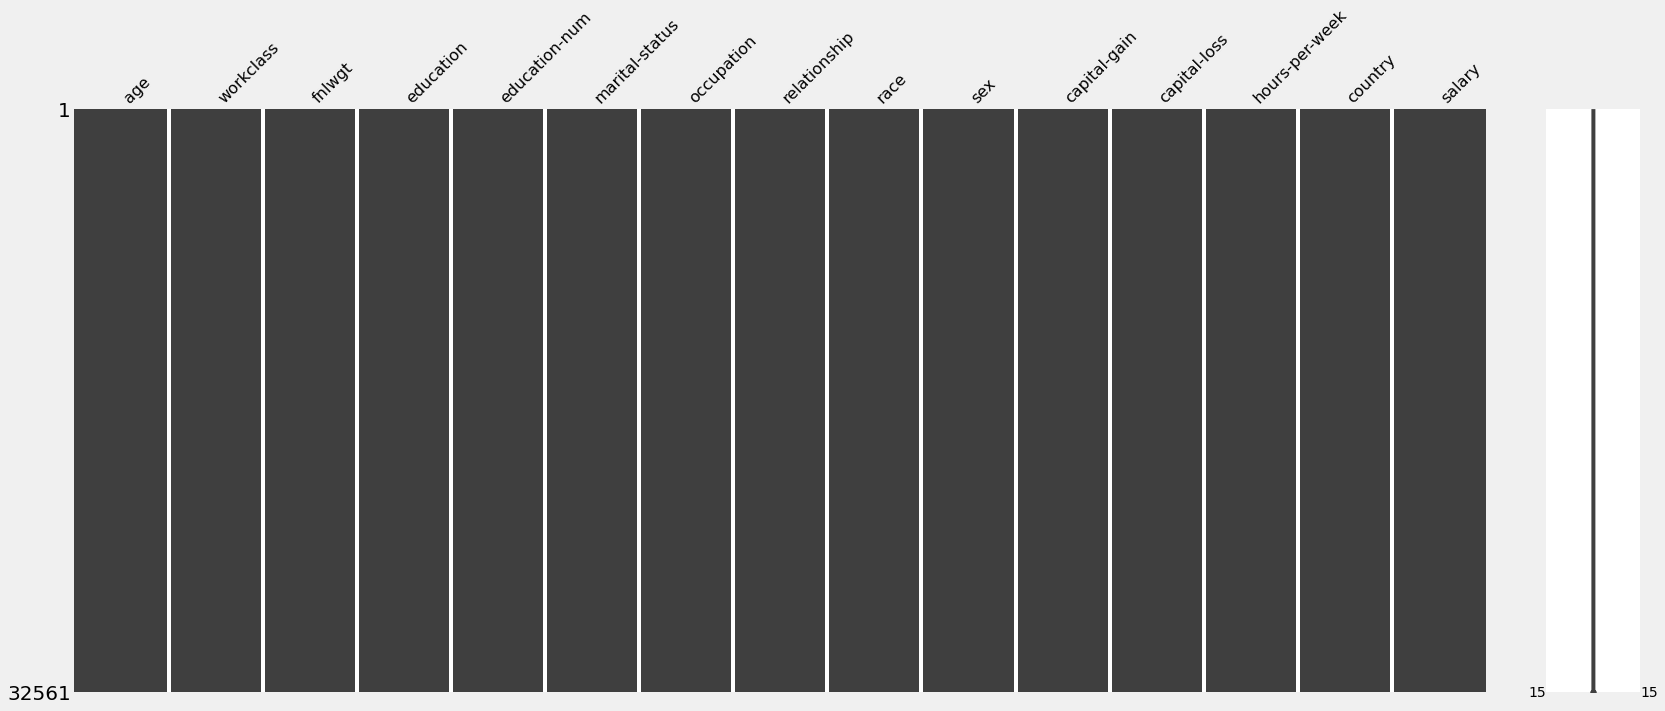

In [7]:
#let's check that wheather there are null values

import missingno as msno

msno.matrix(df)


<AxesSubplot:>

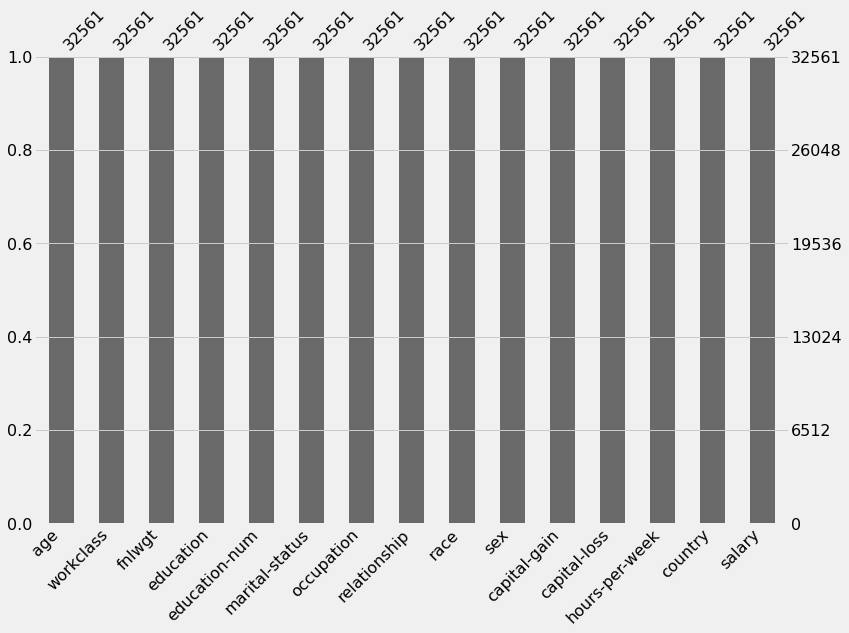

In [8]:
msno.bar(df, figsize=(12,8))

from above two plots we can see that there are no null values

In [9]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
country              42
salary                2
dtype: int64

In [10]:
df.skew()

age                0.558743
fnlwgt             1.446980
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64

There is skewness present in the data which needs to be removed.

In [11]:
#let's see that how  many peaople are there who are getting salry above then 50k and person who are getting salry lower thn 50k

df['salary'].value_counts()


 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [12]:
df['salary'].value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: salary, dtype: float64

76% of the population earns below 50K USD which indicates an unequal distribution of the target variable. We will have to consider this while training our ML model

In [13]:
#lets split data into catagroical and numerical feature so we can undersatnd data insight better

cols_df = pd.DataFrame(df.dtypes)
num_cols = list(cols_df[cols_df[0]=='int64'].index)
cat_cols = list(cols_df[cols_df[0]=='object'].index)
print('Numeric variables includes:','\n',num_cols)
print('\n')
print('Categorical variables includes','\n',cat_cols)

Numeric variables includes: 
 ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Categorical variables includes 
 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country', 'salary']


In [14]:
#lets see what values workclass feature contain

df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

<AxesSubplot:>

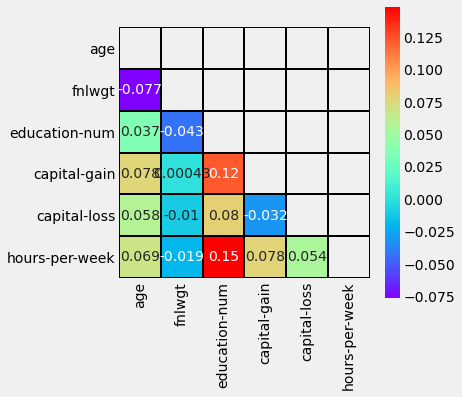

In [15]:
#1. Correlation between numberic variables
plt.figure(figsize=(5,5))

matrix = np.triu(df.corr()) 
sns.heatmap(df.corr(),cmap='rainbow',square=True,linecolor='black',linewidths=1, annot = True, mask=matrix)

from below we can see that There is no strong positive or negative correlation between these variables. Thus we are unlikely to run into any multi-collinearity issues in the model

Text(0, 0.5, 'No. of Individuals')

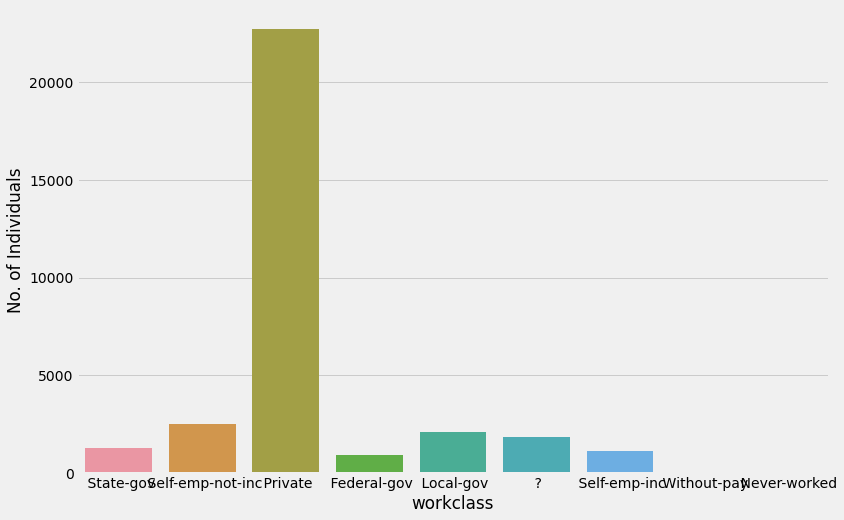

In [16]:
#workclass
plt.figure(figsize=(12,8))
sns.countplot(x='workclass',data=df)
plt.ylabel('No. of Individuals')

There are 9 workclass in total including Never worked and one 
unknown category(?).Most individuals work in private sector and
there are very few who have never worked or work without pay. 
There are 3 categories of govt job provided state, federal and 
local among which no. of people working in the local govt is 
highest.

In [17]:
#education
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

Text(0, 0.5, 'No. of Individuals')

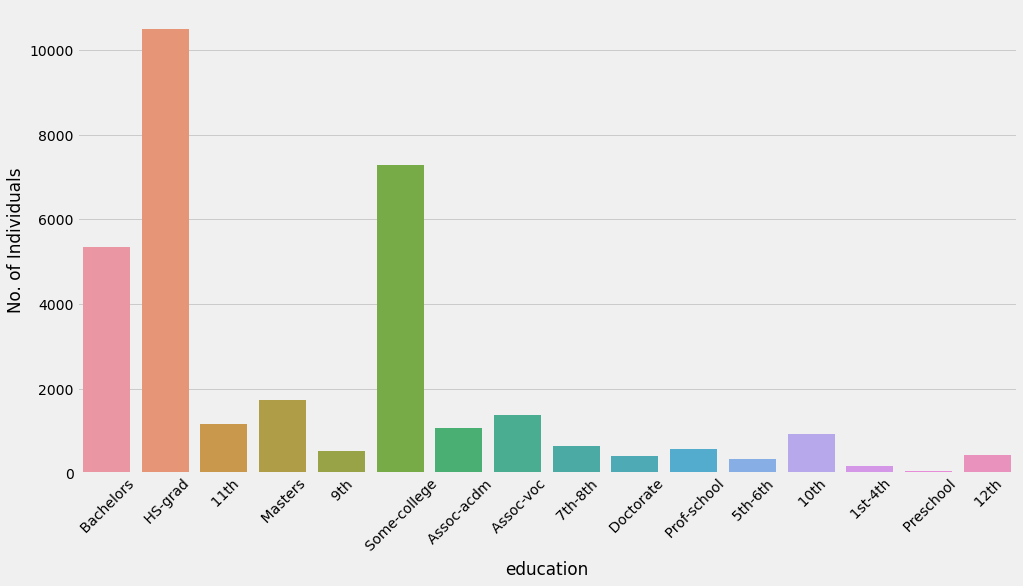

In [18]:
plt.figure(figsize=(15,8))

sns.countplot(x='education',data=df)
plt.xticks(rotation=45)
plt.ylabel('No. of Individuals')

Most of the people are high school graduate. There are few who 
have done masters and doctorate. The no. of people who 
went through just the preschool or 1st to 4th is the least.

In [19]:
#education-num
df['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

Text(0, 0.5, 'No. of Individual')

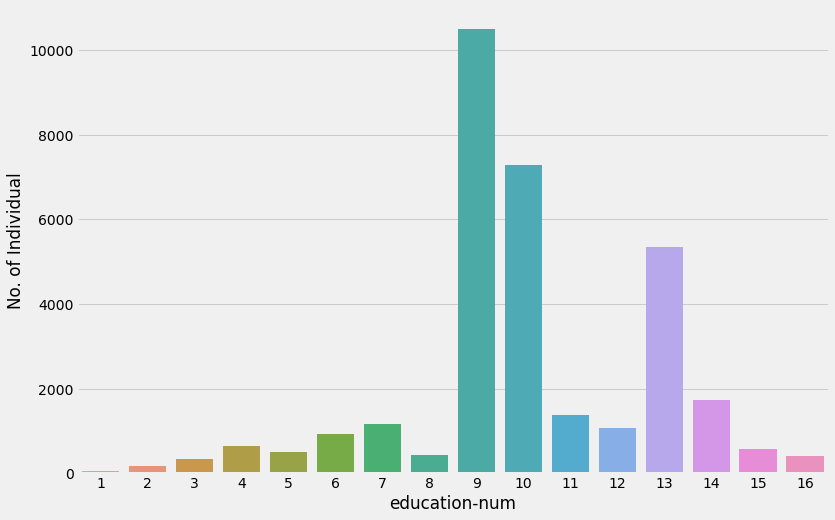

In [20]:
sns.countplot(x='education-num', data=df)
plt.ylabel('No. of Individual')

Majority of individuals lie in the 9th 10th category of education
no. which is a liitle higher than the median education number. 
People with least and highest educations are very few.

In [22]:
#marital-status
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

Text(0, 0.5, 'No. of Individuals')

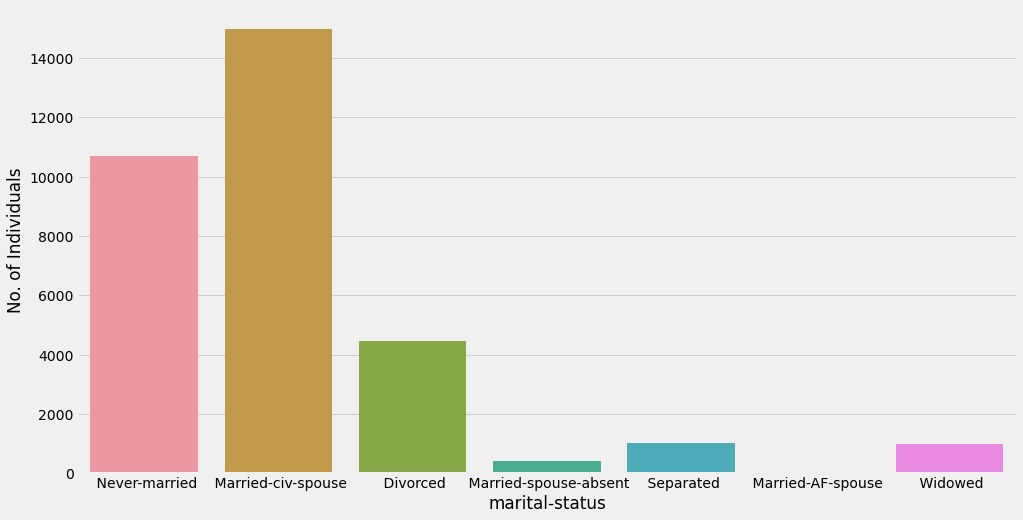

In [23]:
plt.figure(figsize=(15,8))


sns.countplot(x='marital-status',data=df)
plt.ylabel('No. of Individuals')

Majority of people are married to a civialian spouse or Never
married. Least people are married to armed forces. From the 
above maritial status data we can see that there 
are less young people in the workforce as compared to young ones.

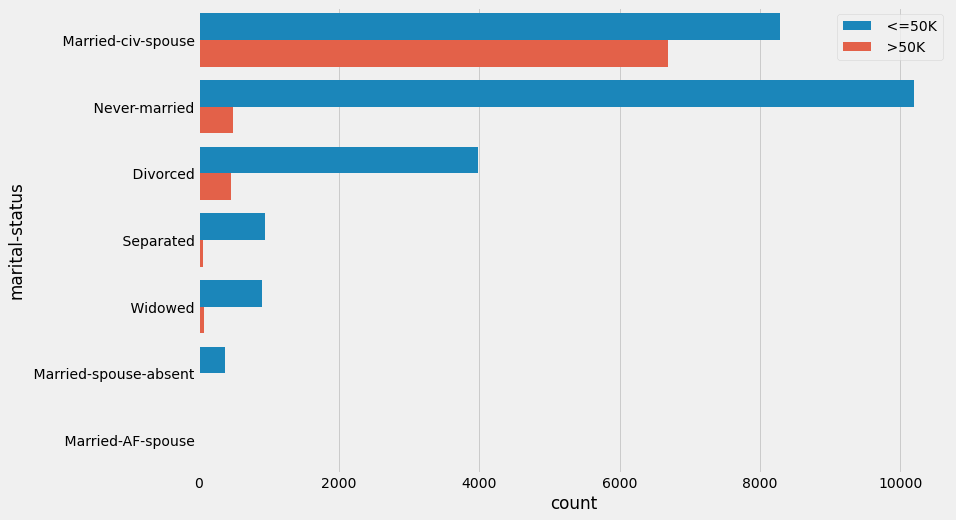

In [25]:
sns.countplot(y=df['marital-status'], hue=df['salary'], order = df['marital-status'].value_counts().index)
plt.legend(loc = 'best')
#We see that most of the married people are earning more than 50k as compared to other classes

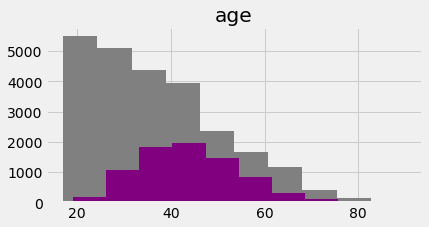

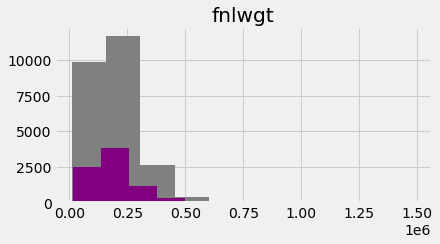

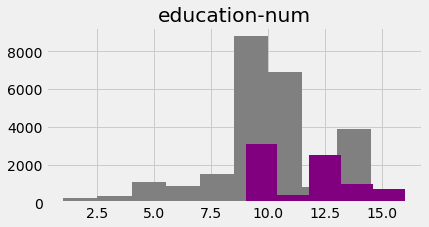

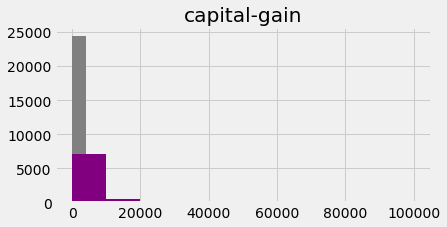

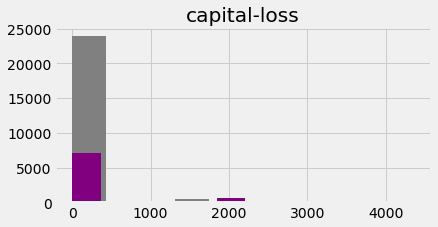

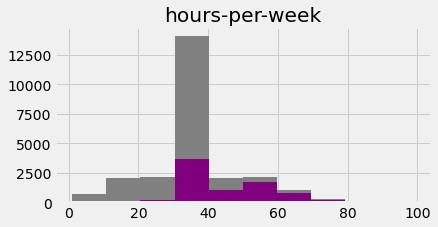

In [26]:
#histogram for each feature

for i in num_cols:
    plt.figure(figsize=(6,3))
    df[df['salary']==' <=50K'][i].hist(color='gray')
    df[df['salary']==' >50K'][i].hist(color='purple')
    plt.title(i)
    plt.show();

In [27]:
#occupation
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

Text(0, 0.5, 'No. of Individuals')

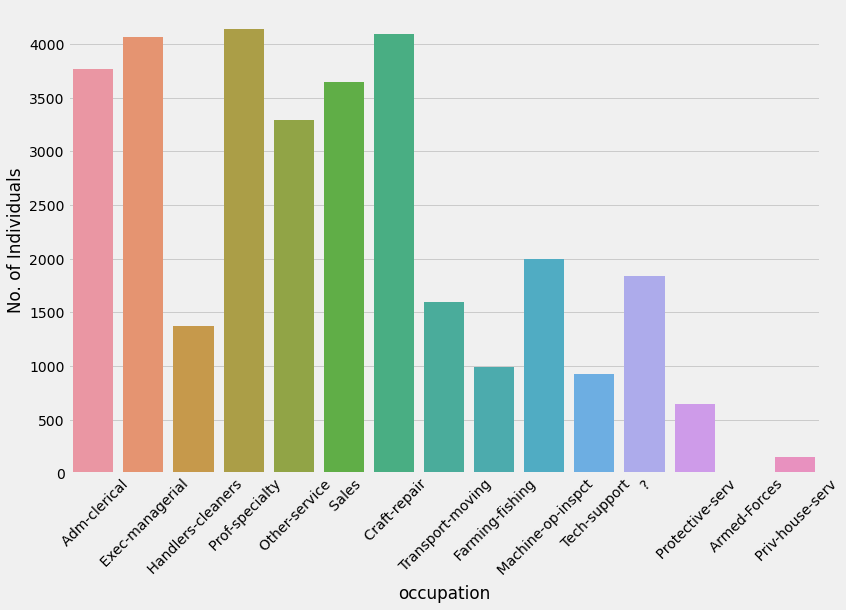

In [28]:
sns.countplot(x='occupation',data=df)
plt.xticks(rotation=45)
plt.ylabel('No. of Individuals')

We can observe over here that prof-speciality has the highest 
number for people than any other occupation. followed by craft
repair persons. Minimum occupation category is the armed forces
with only9 people in it. There is an unknown category of 
occupation too.

In [29]:
#relationship
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

Text(0, 0.5, 'No. of Individuals')

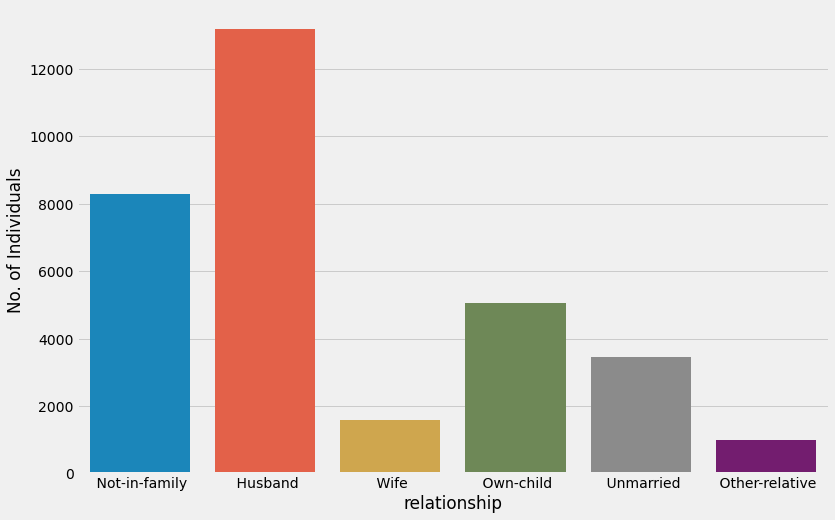

In [30]:
sns.countplot(x='relationship',data=df)
plt.ylabel('No. of Individuals')

There are much more husband working than their wives. 
There are 25% individuals working who 
fall in not in family category.

In [31]:
#race
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

Text(0, 0.5, 'No. of Individuals')

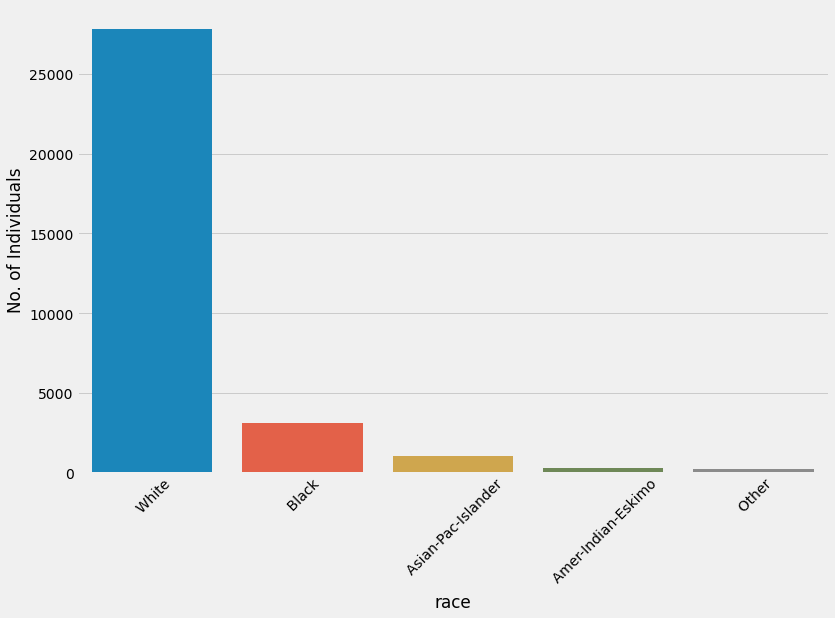

In [32]:
sns.countplot(x='race',data=df)
plt.xticks(rotation=45)
plt.ylabel('No. of Individuals')

SInce this is from european countries, most of the individuals
working here are white. There is also an other category where
minory races are present.

In [33]:
#sex
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

'There is more than double the number of men working than the no. of women.'

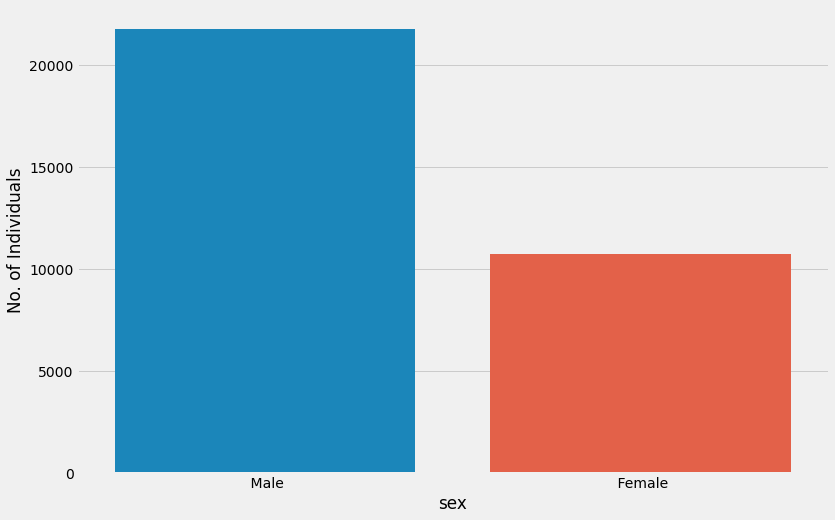

In [34]:
sns.countplot(x='sex',data=df)
plt.ylabel('No. of Individuals')

"There is more than double the number of men working than the no. of women."

In [35]:
#country
df['country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Text(0, 0.5, 'No. of Individuals')

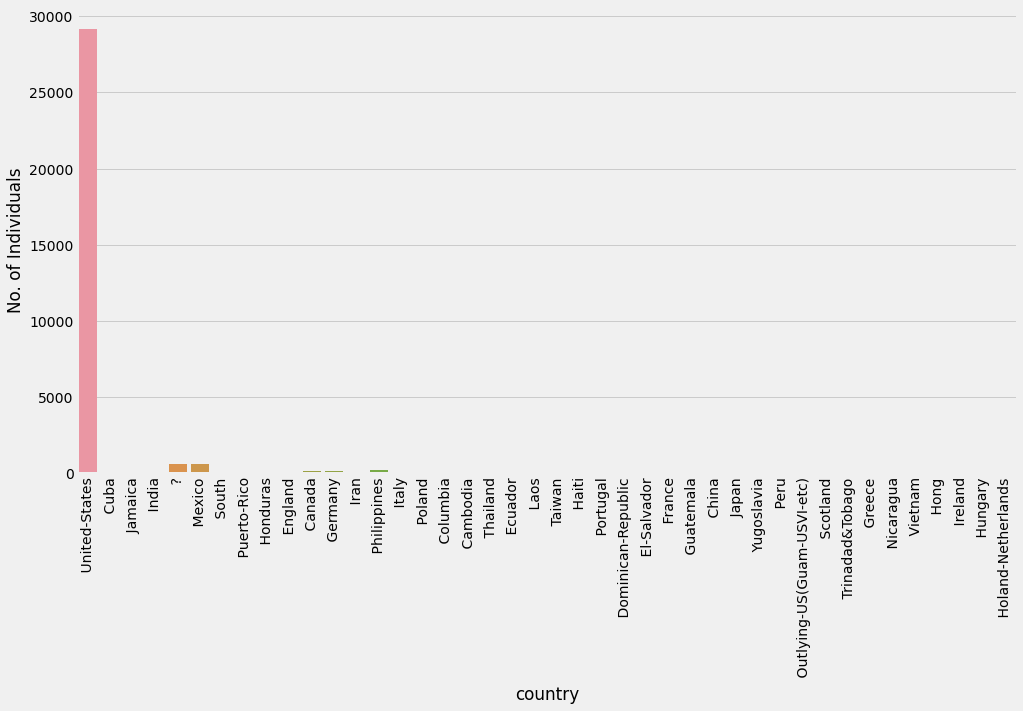

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(x='country',data=df)
plt.xticks(rotation=90)
plt.ylabel('No. of Individuals')

Majority of the people working belong from U.S. whereas there
are people who come to U.S. from their own countries but there 
no. is very low. Second highest no. of people belong from 
Mexico as it is a neighboring country.

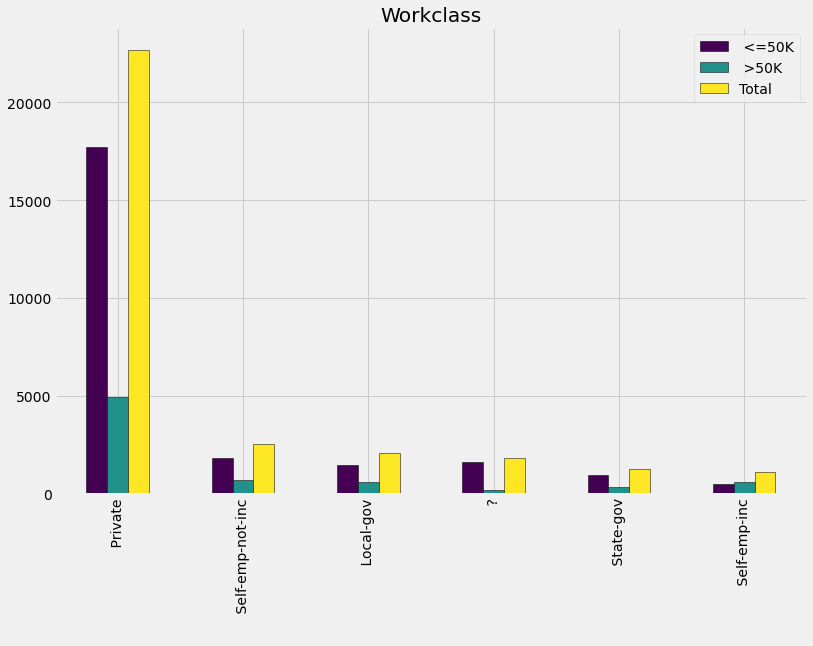

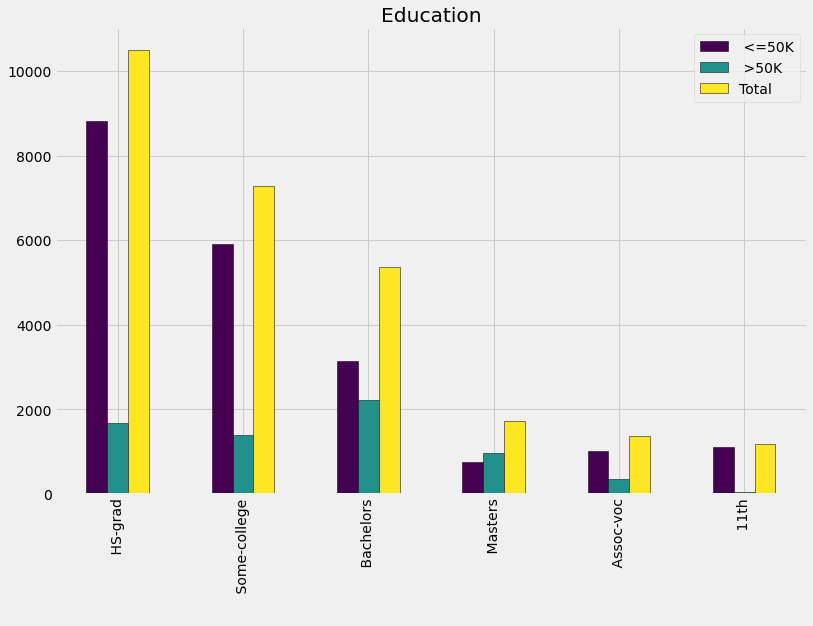

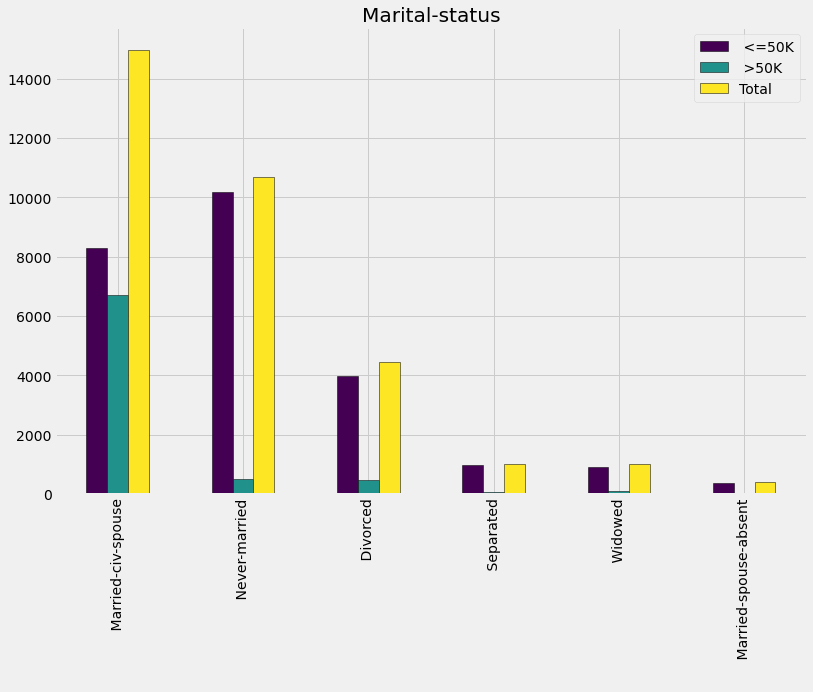

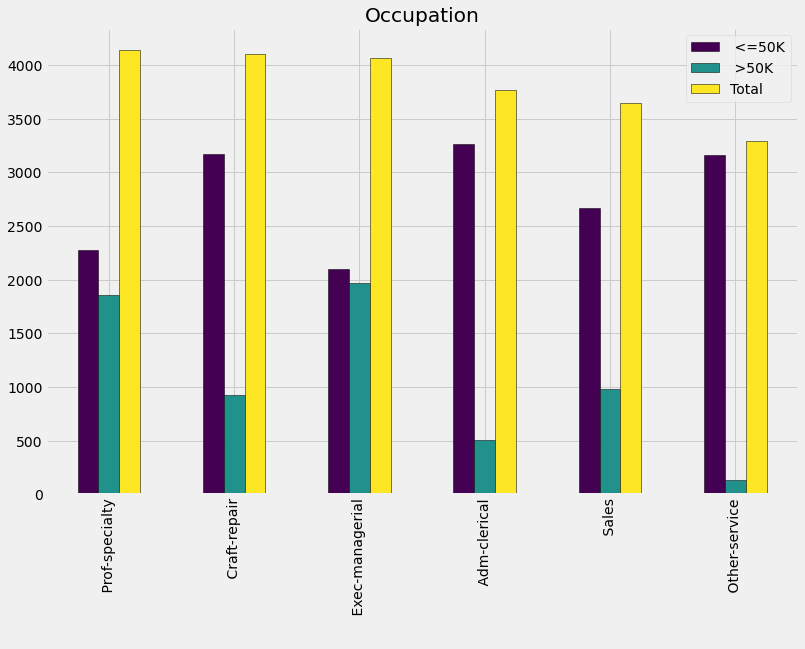

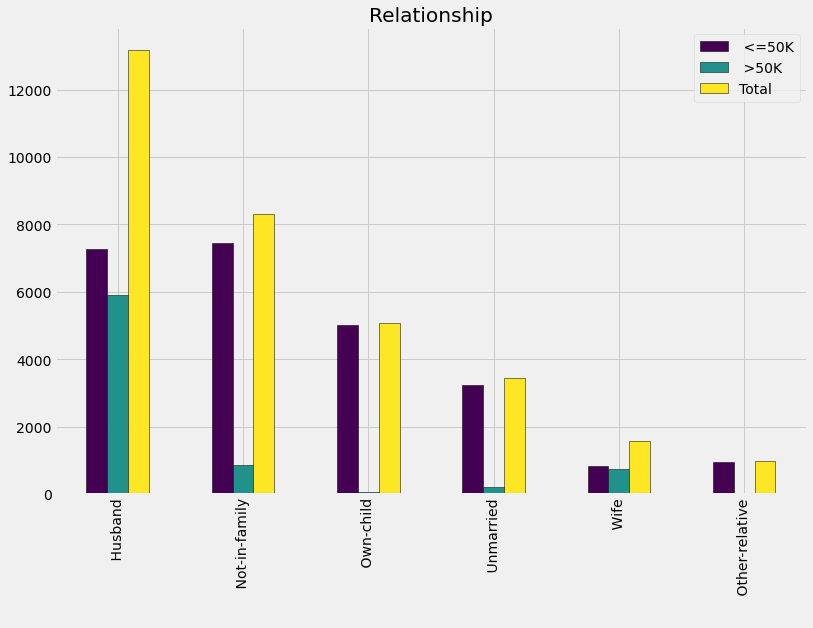

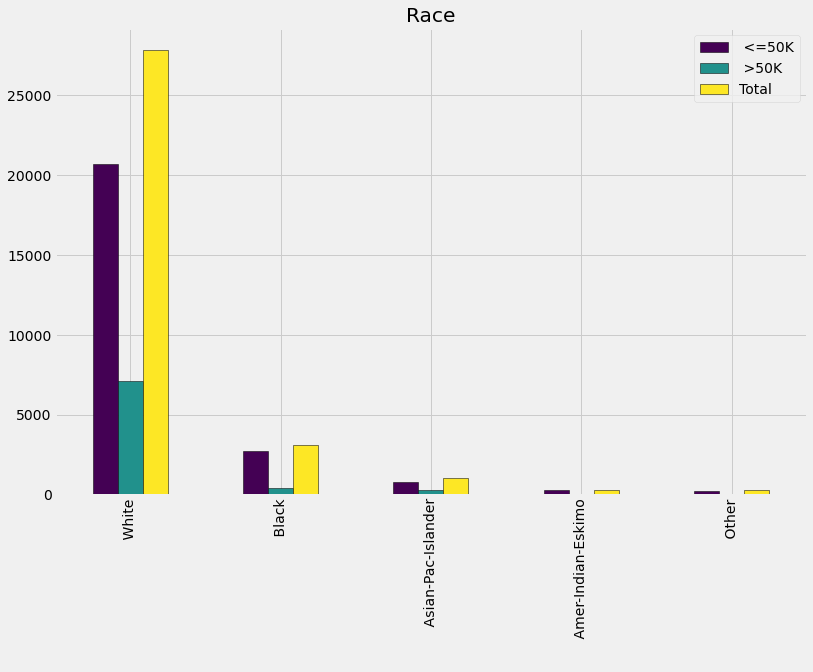

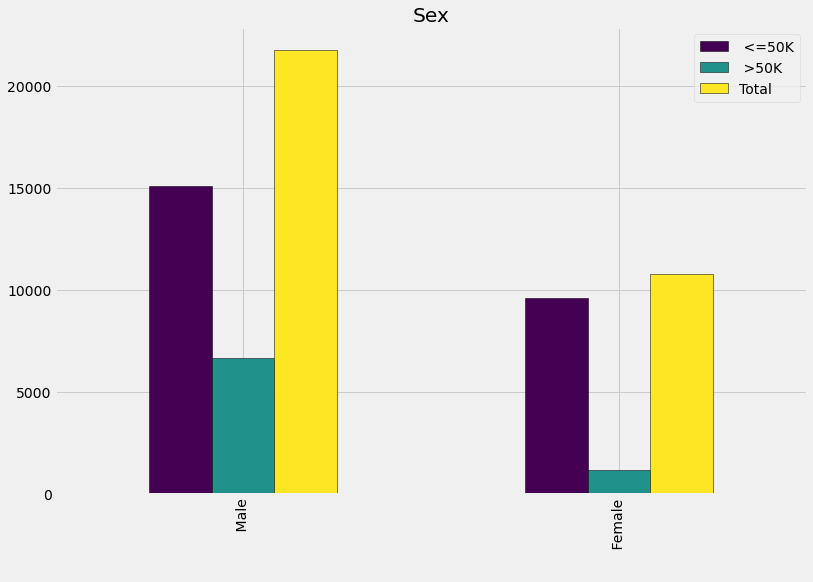

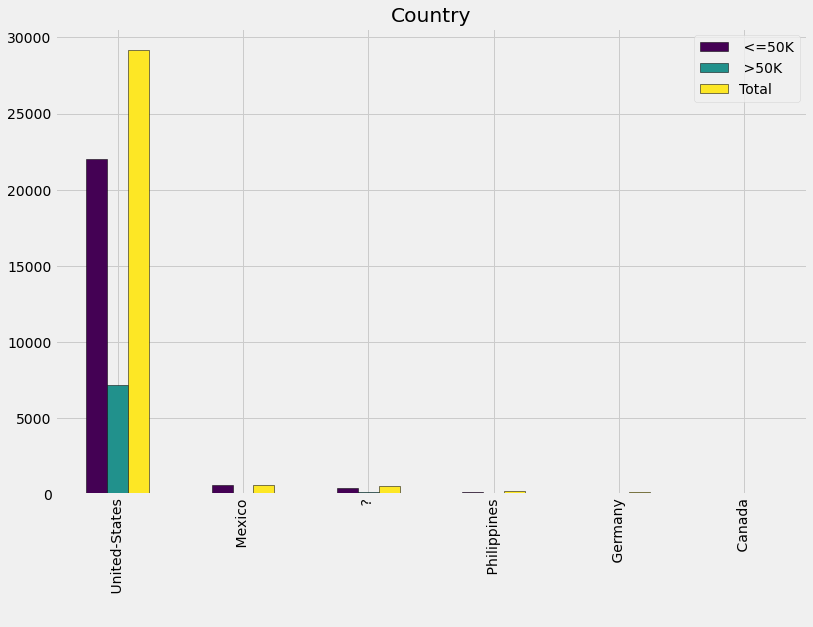

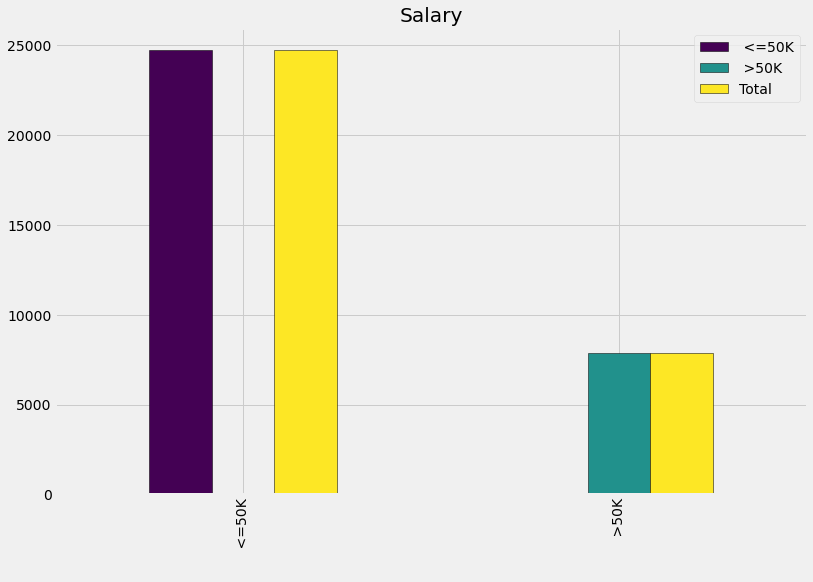

In [37]:
#lets take a quick look at all catgroican feature with respesct 
#to the label i.e., salary >50k or salary <= 50k 

#Categorical Variables
for i in cat_cols:
    ct = pd.crosstab(df[i],df['salary'],margins=True, margins_name="Total")
    ct.drop(labels='Total',axis=0,inplace=True) #Removing subtotal row 
    ct.sort_values(by='Total',ascending=False,inplace=True) #Sorting based on total column
    #Selecting only top 6 categories for plotting
    ct.iloc[:6,:].plot(kind='bar',colormap='viridis',edgecolor='black')  
    plt.xlabel(' ')
    plt.title(str(i).capitalize())
    plt.legend(loc=1)
    plt.show()


from above plots

Count plot observations: We are only looking at top 6 categories for each variable on different salary levels and 
total level (for benchmarking our observations)

Leading attributes of <=50K income group:
No clear distinction on the workclass since both groups are majorly employed in the private sector
High school or some college graduates
Unmarried (could be partly due to younger age)
Common occupation includes craft/repair, admin-clerical and other services (may be unorganised in nature)
Equal proportion of individuals who are not in a family setting and are husbands
Race distribution is similar to overall population distribution for this group
Gender and native country follow a pattern similar to the entire population for both the groups (i.e. largely males from USA itself)

Leading attributes of >50K income group:
Largely employed in the private sector
More frequenct bachlor degree holders (in line with our observation on higher education level)
Significant proportion is married and living with a spouse
These individuals hold highly specialised positions in the workforce like executive management and prof-specialty (which partly explain the higher income)
Most play an active family role as a husband or wife
Whites dominate this income group, however it should be noted this is also the general population distribution


**bivariate_analysis**

Minimum 17
Maximum 90


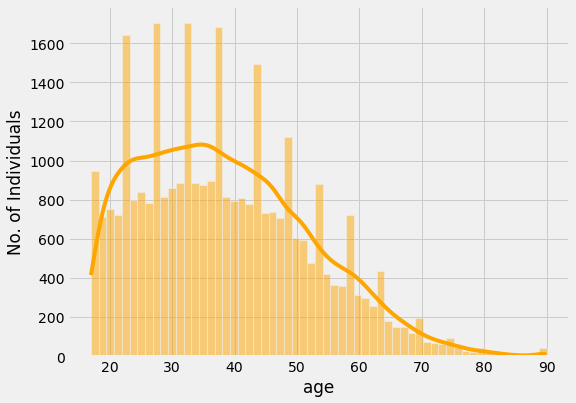

In [39]:
#numeric column

plt.figure(figsize=(8,6))
sns.histplot(df['age'],kde=True,color='orange')
plt.ylabel('No. of Individuals')
print('Minimum',df['age'].min())
print('Maximum',df['age'].max())

Minimum age of a working individual is 17 and highest is 90 which 
is way far retirement, but majority of the people working are in
the age 25 to 45. Data is skewed to the right side.

Minimum 12285
Maximum 1484705


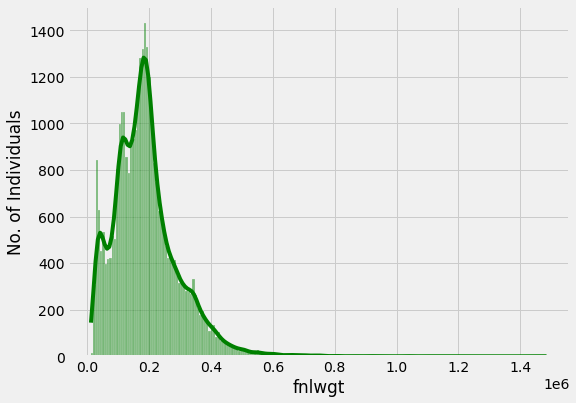

In [40]:
#final wieght

plt.figure(figsize=(8,6))
sns.histplot(df['fnlwgt'],kde=True,color='green')
plt.ylabel('No. of Individuals')
print('Minimum',df['fnlwgt'].min())
print('Maximum',df['fnlwgt'].max())

It is assigned by combination of features and has the peak wt as 0.2*1e6. 
Data does not follow normal distribution and data is rigt skewed.

Minimum 0
Maximum 99999


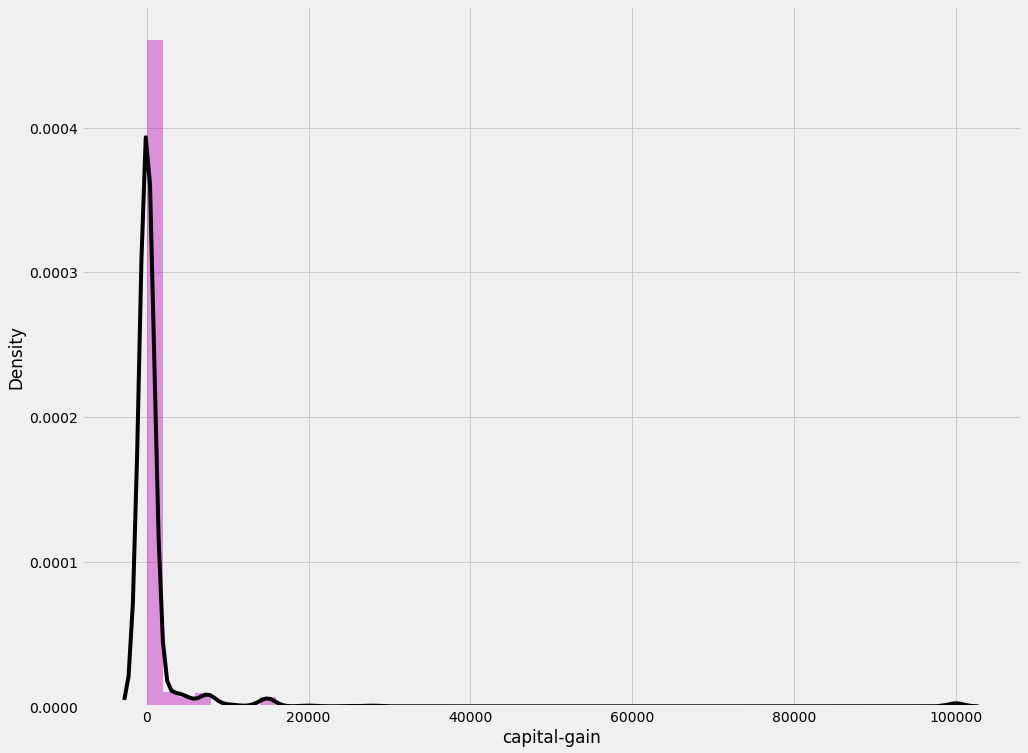

In [41]:
#capital gain

plt.figure(figsize=(15,12))
sns.distplot(df['capital-gain'],color='m', kde_kws={"color": "k"})
print('Minimum',df['capital-gain'].min())
print('Maximum',df['capital-gain'].max())

Minimum capital gain is 0 while the range goes on to 99999 but 
most of the people are with the gain of 1000. Data is highly 
skewed with a very long tail due to presence of large outliers.
Outliers here are very few people belonging to elite class who 
have very large capital gains.


Minimum 0
Maximum 4356


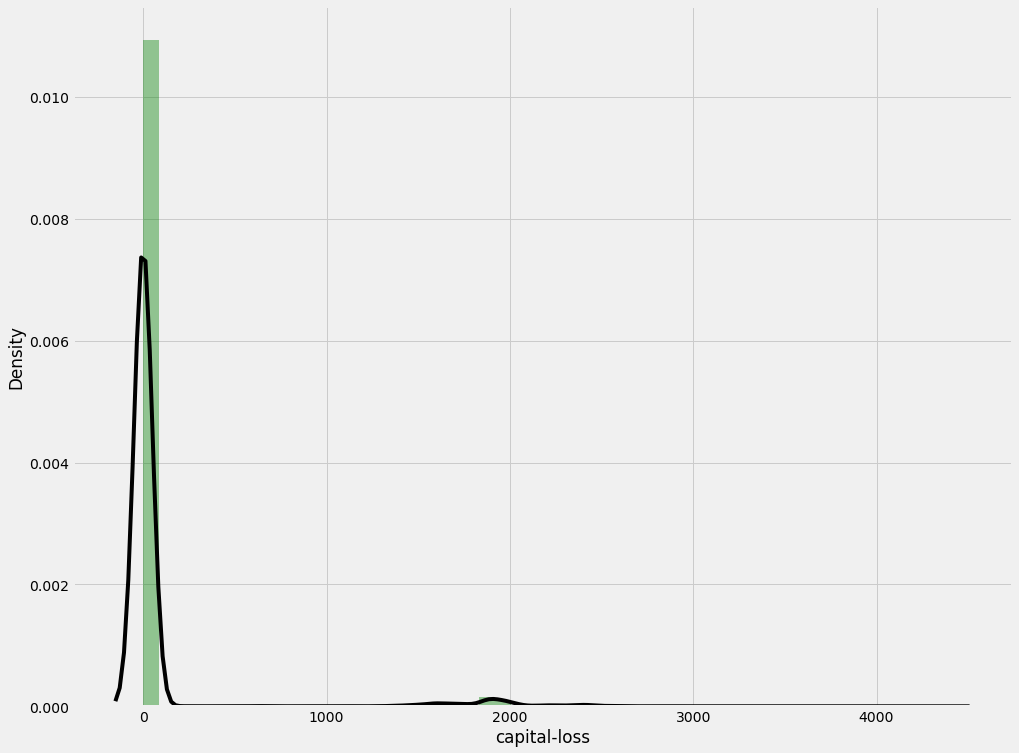

In [42]:
#capital_loss
plt.figure(figsize=(15,12))
sns.distplot(df['capital-loss'],color='g', kde_kws={"color": "k"})
print('Minimum',df['capital-loss'].min())
print('Maximum',df['capital-loss'].max())

Minimum capital loss is 0 while the range goes on above 4000 but
most of the people are with the loss of 1000. There is also a 
slight peak seen near 2000. 
Data is highly skewed with a long tail to the right side.

Minimum 1
Maximum 99


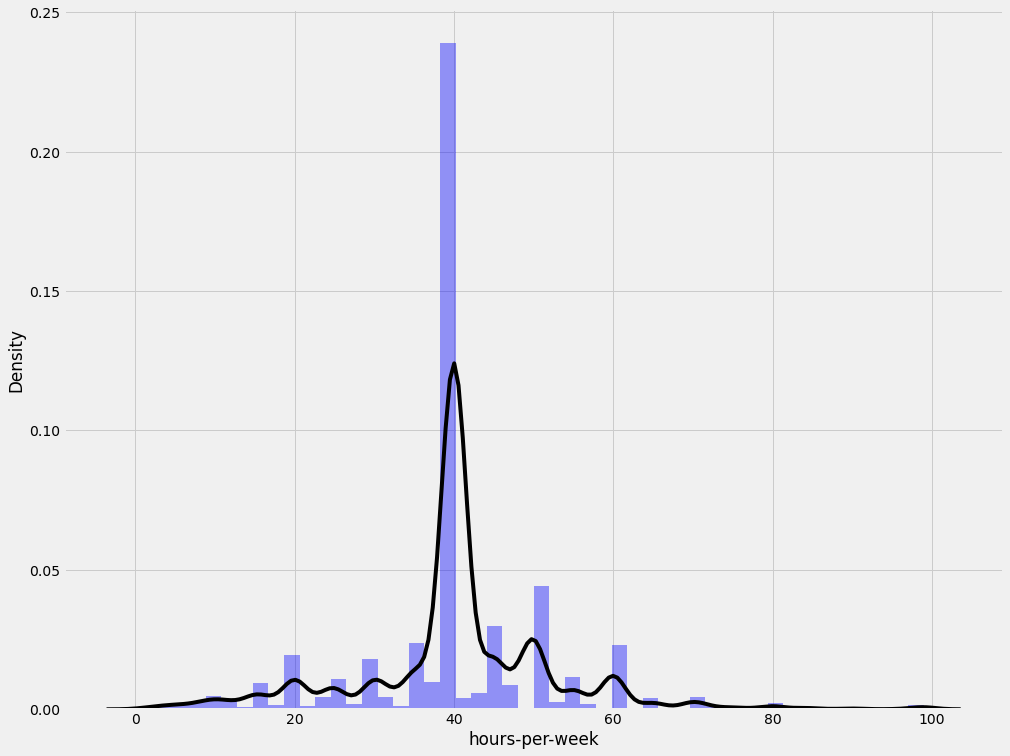

In [43]:
#hours-per-week

plt.figure(figsize=(15,12))
sns.distplot(df['hours-per-week'],color='b', kde_kws={"color": "k"})
print('Minimum',df['hours-per-week'].min())
print('Maximum',df['hours-per-week'].max())

Most of the people work 40 hours a day where there is a high 
chance that they belong to private sector. There are people 
working as low ass 1 hour a week and as high as 99 hours a week
which undoubtfully might belong from the armed forces. Data shows
less skewness compared to the other features in the dataframe.

'\nPeople with higher mean age earn >50k while\nthere are individuals earning <=50k even wat very high age.\n'

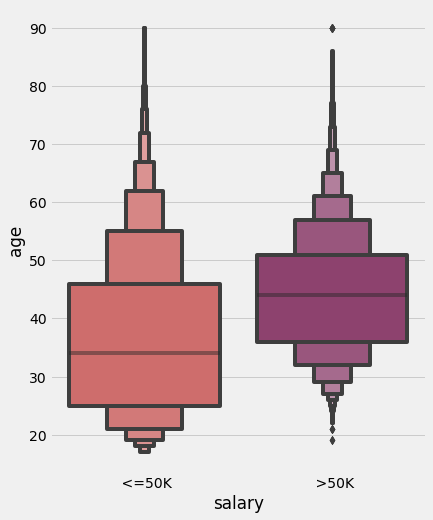

In [49]:
plt.figure(figsize=(6,8))
sns.boxenplot(x='salary',y='age',data=df,palette="flare")
"""
People with higher mean age earn >50k while
there are individuals earning <=50k even wat very high age.
"""


'\nPeople are equally divided with respect to fnlwgt in the income\ncategory while it is seen that as the fnlwt is \nhigh indiduals fall into <=50k income category.\n'

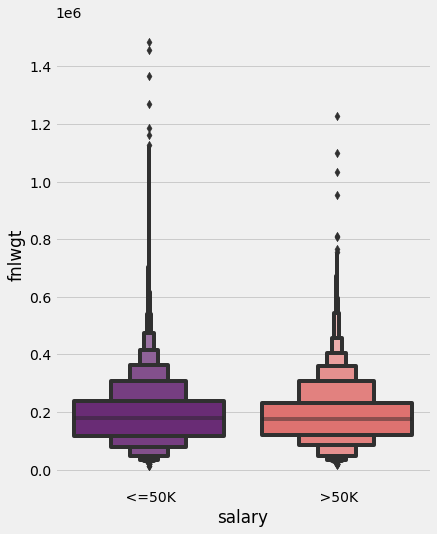

In [50]:
plt.figure(figsize=(6,8))
sns.boxenplot(x='salary',y='fnlwgt',data=df,palette="magma")

"""
People are equally divided with respect to fnlwgt in the income
category while it is seen that as the fnlwt is 
high indiduals fall into <=50k income category.
"""

'\nAs the capital gain increases more people fall into >50k salary \nwhile mean of both categories remain cloase to zero capital.gain\n'

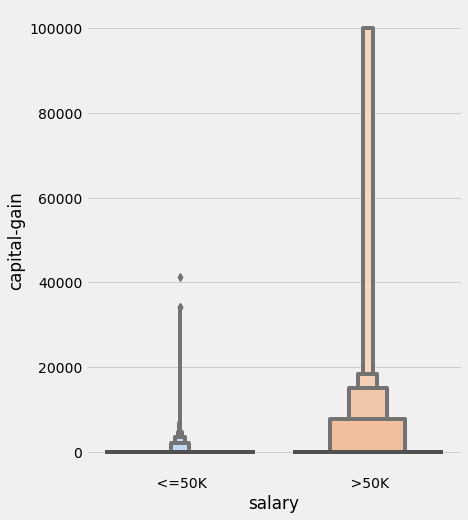

In [51]:
plt.figure(figsize=(6,8))
sns.boxenplot(x='salary',y='capital-gain',data=df,palette="pastel")


"""
As the capital gain increases more people fall into >50k salary 
while mean of both categories remain cloase to zero capital.gain
"""

'\nThere is more density in the >50k income category with increase in capital loss \nwhile mean of both categories remain cloase to zero capital-gain\n\n'

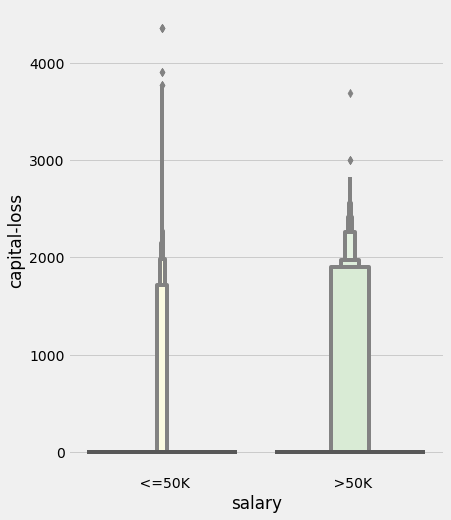

In [52]:
plt.figure(figsize=(6,8))
sns.boxenplot(x='salary',y='capital-loss',data=df,palette="Pastel1_r")


"""
There is more density in the >50k income category with increase in capital loss 
while mean of both categories remain cloase to zero capital-gain

"""

'\nPeople earning >50K income work mean hours per week greater than\ntose earning <50K while people from both the categories work \nfrom min to max hours per week.\n\n'

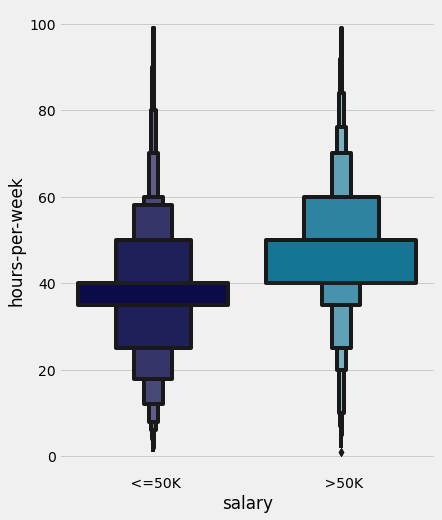

In [53]:
plt.figure(figsize=(6,8))
sns.boxenplot(x='salary',y='hours-per-week',data=df,palette="ocean")


"""
People earning >50K income work mean hours per week greater than
tose earning <50K while people from both the categories work 
from min to max hours per week.

"""

**age vs categorical feature**

"\nIndividuals working in the government secctor have atmost age 70\nto 80 with few outliers which must be the retirement age for them.\nThere are no individuals who do not work after age of 30. There\nare no individuals of age >70 belonging to the pre school \neducation category while Doctorates and proffessors appear from \nlate 20's as they have to study for more years to get to that \nlevel of education. Same is the case with education num, as the \neducation number increases age also is increased. There are no \npeople after the age of 50 in the married to armed forces \ncategory with just a few outliers. Widowed category has seen \nincrease as the age age seem to increase, there are very few \nwidows at an early age. There are less people with high age\nfrom other races than the white race. There are more no. of \nworking men at higher age than women. There \nare very few people belonging from other countries with high age.\n\n"

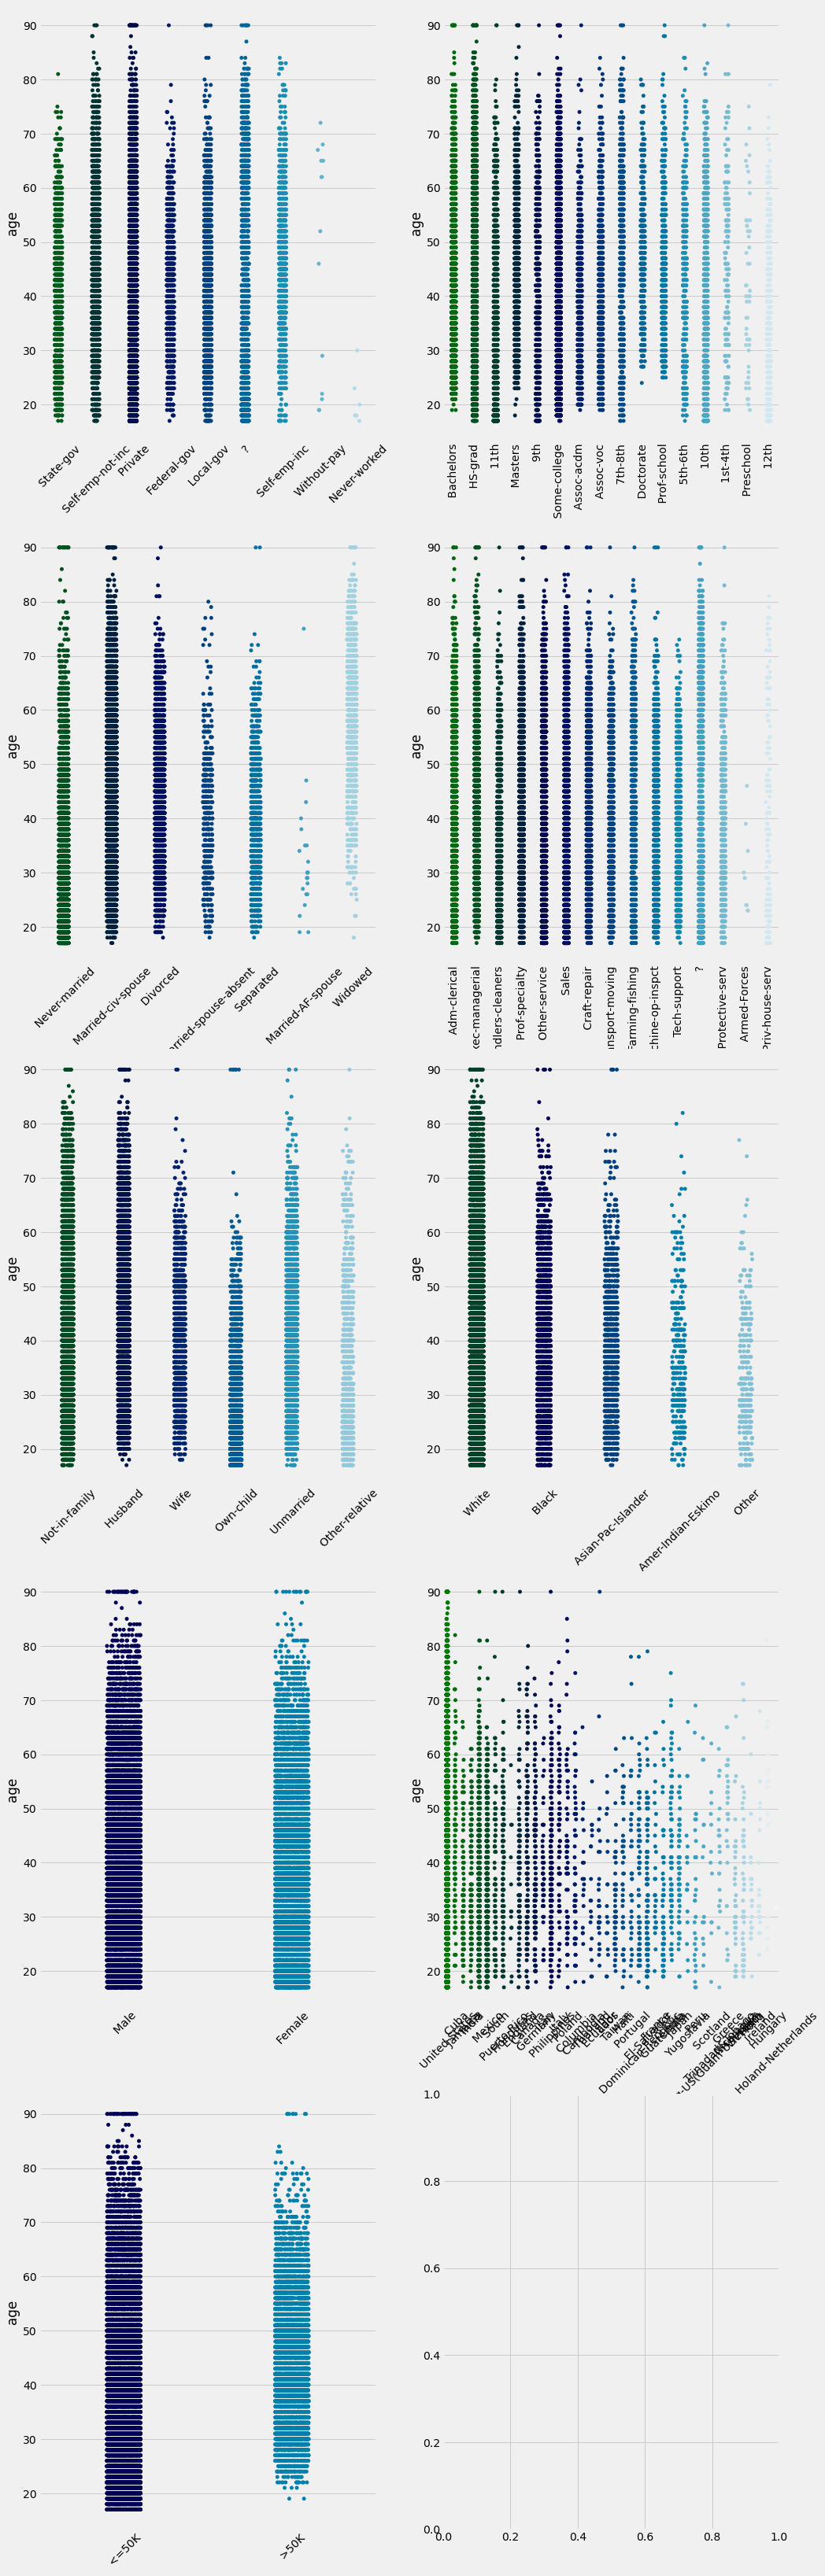

In [54]:
#age vs Categorical features
fig,ax=plt.subplots(5,2,figsize=(15,55))
r=0
c=0
for i,n in enumerate(cat_cols):
    if i%2==0 and i>0:
        r+=1
        c=0
    graph=sns.stripplot(x=n,y='age',data=df,ax=ax[r,c], palette = 'ocean')
    if n=='native-country' or n=='occupation' or n=='education':
        graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
    else:
        graph.set_xticklabels(graph.get_xticklabels(),rotation = 45)
    if n!='education-num':
         graph.set(xlabel=None)
    c+=1
        
"""
Individuals working in the government secctor have atmost age 70
to 80 with few outliers which must be the retirement age for them.
There are no individuals who do not work after age of 30. There
are no individuals of age >70 belonging to the pre school 
education category while Doctorates and proffessors appear from 
late 20's as they have to study for more years to get to that 
level of education. Same is the case with education num, as the 
education number increases age also is increased. There are no 
people after the age of 50 in the married to armed forces 
category with just a few outliers. Widowed category has seen 
increase as the age age seem to increase, there are very few 
widows at an early age. There are less people with high age
from other races than the white race. There are more no. of 
working men at higher age than women. There 
are very few people belonging from other countries with high age.

"""

'\nGovt employees do not work more than 80 hours a week that also \nwith rare cases. It is seen that people with less education worl\nmore no. hours of the week which is quite logical. No armed \nforce person works more than 60 hours a week while farmers and\ntransport movers has working hours mean higher than other \noccupation. More no, of individuals who have relationship as own\nchild have high density for working only 20 hous \na week. Female works for less no. of hours as compared to men.\n\n\n'

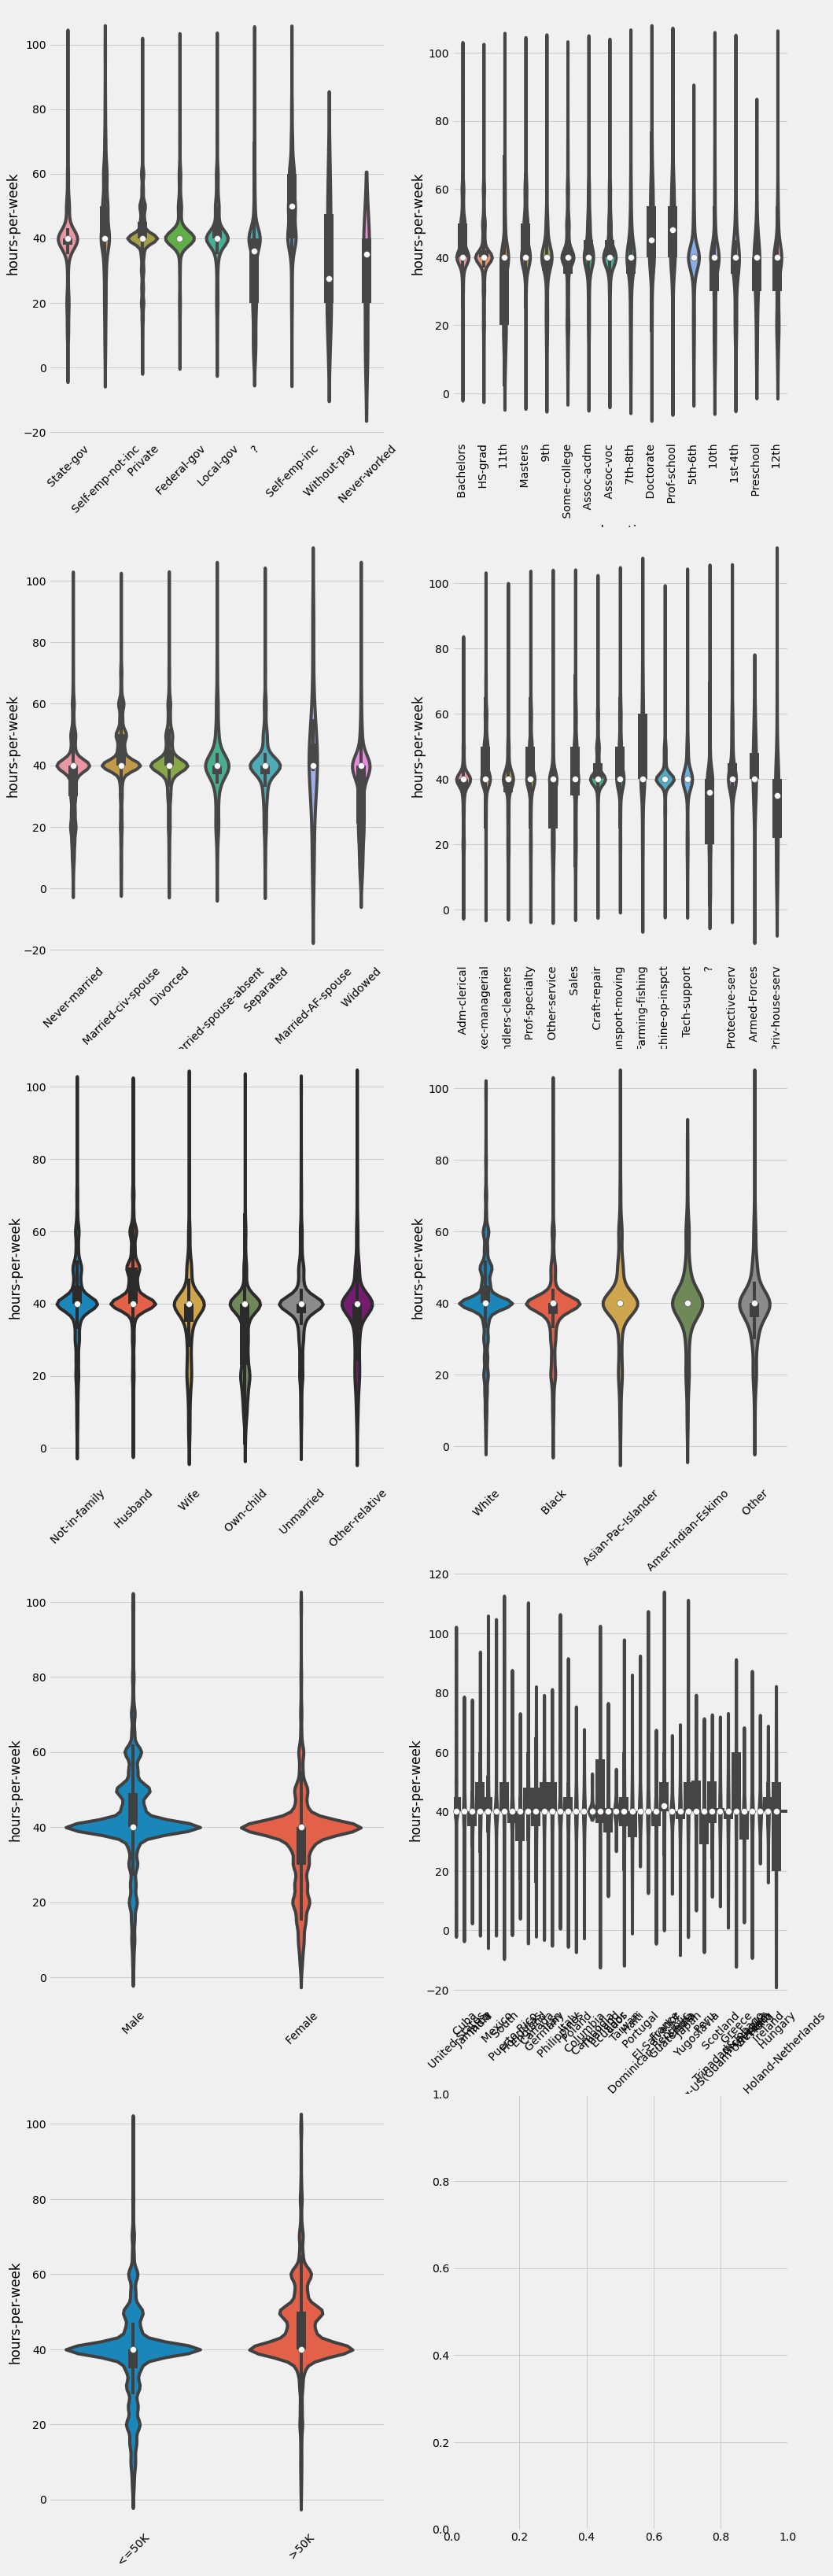

In [55]:
#Hours per week vs categorical Feature
fig,ax=plt.subplots(5,2,figsize=(15,55))
r=0
c=0
for i,n in enumerate(cat_cols):
    if i%2==0 and i>0:
        r+=1
        c=0
    graph=sns.violinplot(x=n,y='hours-per-week',data=df,ax=ax[r,c])
    if n=='native-country' or n=='occupation' or n=='education':
        graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
    else:
        graph.set_xticklabels(graph.get_xticklabels(),rotation = 45)
        if n!='education-num':
            graph.set(xlabel=None)
        c+=1
        
        
"""
Govt employees do not work more than 80 hours a week that also 
with rare cases. It is seen that people with less education worl
more no. hours of the week which is quite logical. No armed 
force person works more than 60 hours a week while farmers and
transport movers has working hours mean higher than other 
occupation. More no, of individuals who have relationship as own
child have high density for working only 20 hous 
a week. Female works for less no. of hours as compared to men.


"""

**multivariate analyisis**


'As the age increases people are paid more but males are paid more than females.'

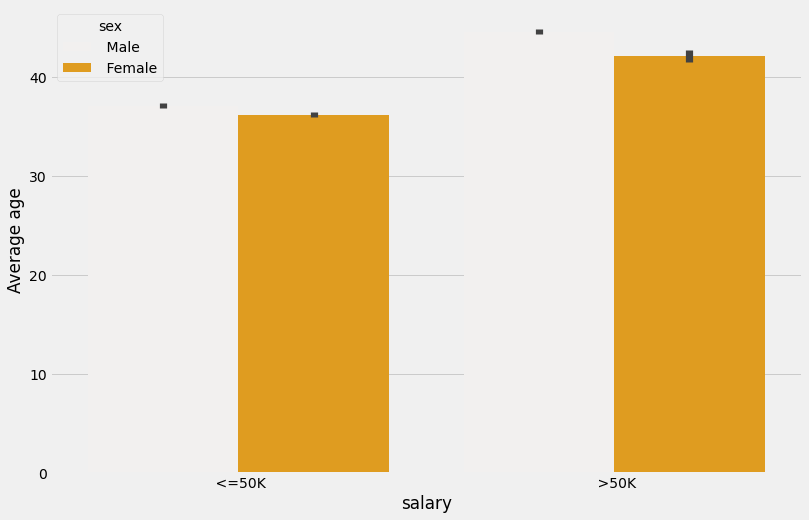

In [56]:
sns.barplot(x='salary',y='age',hue='sex',data=df, color = 'orange')
plt.ylabel('Average age')

"As the age increases people are paid more but males are paid more than females."

'\nSome people belonging to a particular workclass might have less\neducation and some workclass might require more education level,\nbut no matter whatever workclass, people in the same workclass, \nif they have higher education level they earn more. It is also\nto be noticed that there is no person from without pay and never \nworked workclass category who earn more than 50k which is logical.\n\n\n'

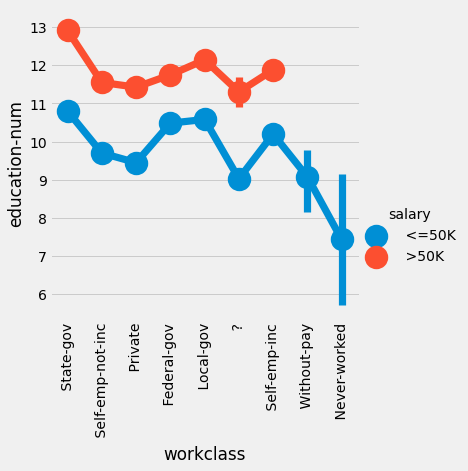

In [57]:
sns.factorplot(x='workclass',y='education-num',hue='salary',data=df)
plt.xticks(rotation=90)



"""
Some people belonging to a particular workclass might have less
education and some workclass might require more education level,
but no matter whatever workclass, people in the same workclass, 
if they have higher education level they earn more. It is also
to be noticed that there is no person from without pay and never 
worked workclass category who earn more than 50k which is logical.


"""

'Females with higher education level earn equal to men having less education level than them irrespective of any income category they fall.'

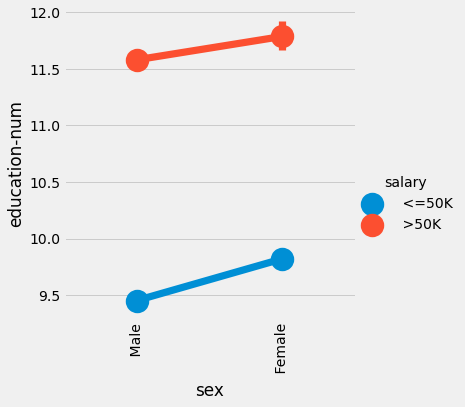

In [58]:
sns.factorplot(x='sex',y='education-num',hue='salary',data=df,)
plt.xticks(rotation=90)

"Females with higher education level earn equal to men having less education level than them irrespective of any income category they fall."


'\nAsian pacific race have comparatively more education than the \nfellows who earn same as much as they do, belonging to other \nraces. Indians \nand some other races earn >50k with lowest education level.\n\n'

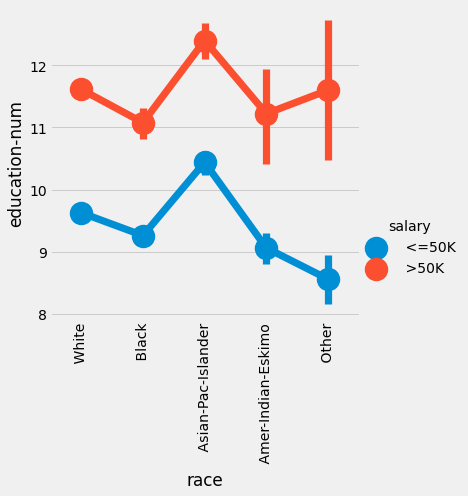

In [59]:
sns.factorplot(x='race',y='education-num',hue='salary',data=df)
plt.xticks(rotation=90)


"""
Asian pacific race have comparatively more education than the 
fellows who earn same as much as they do, belonging to other 
races. Indians 
and some other races earn >50k with lowest education level.

"""

'\nPeople with highest education level belong to armed forces, \nbut people with even education level quite low, who belong to\nhandlers cleaners, transport moving occupation earn as much as\nthey do. Same is the case with prof speciality. occupation of \nprivate house service who earn >50k and <50k have the highest \neducation level difference while prof speciality have the minimum \ndifference.\n\n'

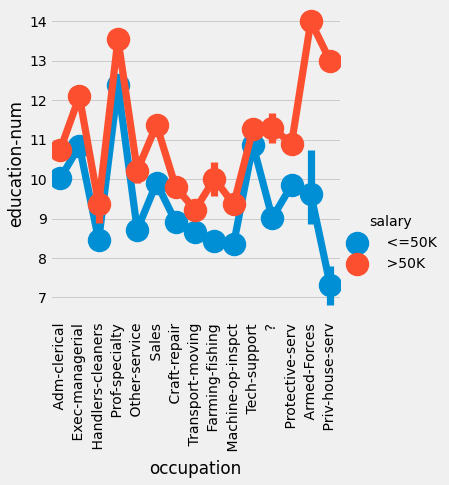

In [60]:
sns.factorplot(x='occupation',y='education-num',hue='salary',data=df)
plt.xticks(rotation=90)


"""
People with highest education level belong to armed forces, 
but people with even education level quite low, who belong to
handlers cleaners, transport moving occupation earn as much as
they do. Same is the case with prof speciality. occupation of 
private house service who earn >50k and <50k have the highest 
education level difference while prof speciality have the minimum 
difference.

"""

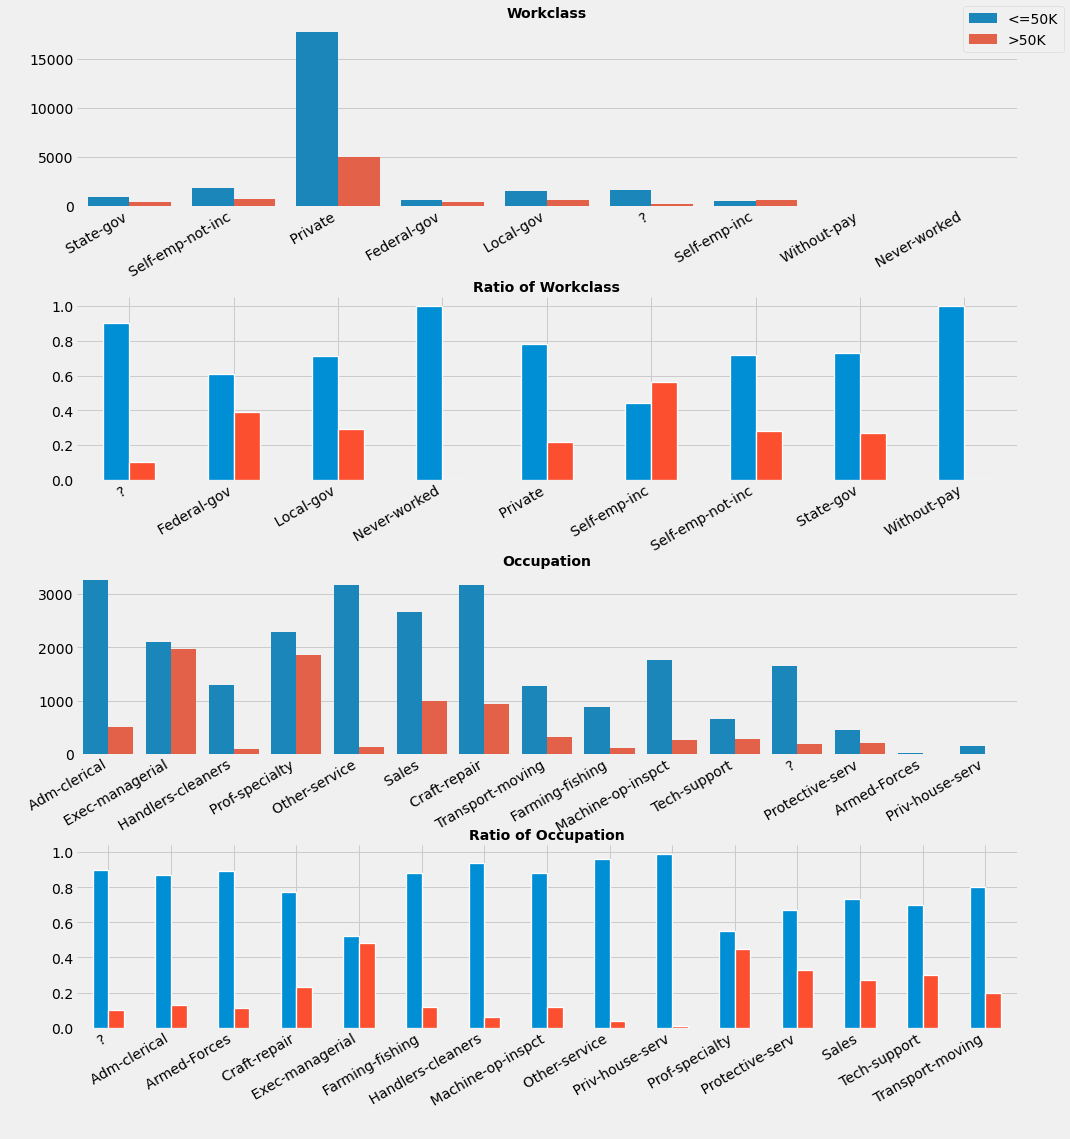

In [44]:
fig = plt.figure(figsize=(15,15))
ax1= fig.add_subplot(411)
ax2= fig.add_subplot(412)
ax3= fig.add_subplot(413)
ax4= fig.add_subplot(414)

data_workclass = round(pd.crosstab(df.workclass, df.salary).div(pd.crosstab(df.workclass, df.salary).apply(sum,1),0),2)
data_occupation = round(pd.crosstab(df.occupation, df.salary).div(pd.crosstab(df.occupation, df.salary).apply(sum,1),0),2)

## Setting space between both subplots
plt.subplots_adjust(left=None,
                    bottom=None, 
                    right=None, 
                    top=1, 
                    wspace=None, 
                    hspace=0.5)

## Grapphing
sns.countplot(x='workclass', hue='salary', data= df, ax=ax1,)
data_workclass.plot.bar(ax=ax2, edgecolor='w',linewidth=1.3)

sns.countplot(x='occupation', hue='salary', data= df, ax=ax3)
data_occupation.plot.bar(ax=ax4, edgecolor='w',linewidth=1.3)

## Removing lines from the graph
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_visible(False)


## Removing subplots legends
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30, ha='right')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=30, ha='right')
ax3.get_legend().remove()
ax4.get_legend().remove()



## Title
ax1.set_title("Workclass", loc='center',fontweight='bold',fontsize=14)
ax3.set_title("Occupation", loc='center',fontweight='bold',fontsize=14)
ax2.set_title("Ratio of Workclass", loc='center',fontweight='bold',fontsize=14)
ax4.set_title("Ratio of Occupation", loc='center',fontweight='bold',fontsize=14)
ax1.set_xlabel(" ")
ax1.set_ylabel(' ')
ax2.set_xlabel(" ")
ax2.set_ylabel(' ')
ax3.set_xlabel(" ")
ax3.set_ylabel(' ')
ax4.set_xlabel(" ")
ax4.set_ylabel(' ')


## Legend
line_labels = ["<=50K", ">50K"]
fig.legend(
    loc="upper right",
    labels=line_labels) 

Here we can see interesting things about our data:

Workclass: From our data Private is the largest category by number. If we look at the ratio, self-empl-inc has 
almost the same amount of people who earn more than 50K and less than 50K, and is the only category where more people earn
above 50K.

Occupation:We can see that Adm-Clerical and Machine-op-Inspect are the most frequent jobs. In terms of income, we 
can say that Exec-Managerical has the highest rate of >50K, followed by Armed Forces. The job with the lowest >50K
is Priv-house-serv

## feature engineering

In [61]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
l=LabelEncoder()
o=OrdinalEncoder()

In [62]:
#We use ordinal encoder to Encode Independent features
for i in df.columns:
    if df[i].dtypes=='O' and i!='income':
        df[i]=o.fit_transform(df[i].values.reshape(-1,1))

In [63]:
#We use label encoder to encode label 
df['salary']=l.fit_transform(df['salary'])

In [64]:
from scipy.stats import zscore

In [65]:
def threshold():
    for i in np.arange(3,5,0.2):
        data=df.copy()
        data=data[(z<i).all(axis=1)]
        loss=(df.shape[0]-data.shape[0])/df.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [66]:
z=np.abs(zscore(df))
threshold()

With threshold 3.0 data loss is 15.79%
With threshold 3.2 data loss is 12.17%
With threshold 3.4 data loss is 11.1%
With threshold 3.6 data loss is 10.2%
With threshold 3.8 data loss is 9.0%
With threshold 4.0 data loss is 8.44%
With threshold 4.2 data loss is 7.46%
With threshold 4.4 data loss is 6.08%
With threshold 4.6 data loss is 4.37%
With threshold 4.8 data loss is 1.55%


In [67]:
"""
From above we choose threhold as 4.2 as data is precious and 
we cannot afford to lose more than 8% of data.
"""

'\nFrom above we choose threhold as 4.2 as data is precious and \nwe cannot afford to lose more than 8% of data.\n'

In [68]:
df=df[(z<4.2).all(axis=1)]

**Removing Skewness**

In [69]:
#using Power transformer to remove skewness
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [70]:
for i in num_cols:
    if np.abs(df[i].skew())>0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

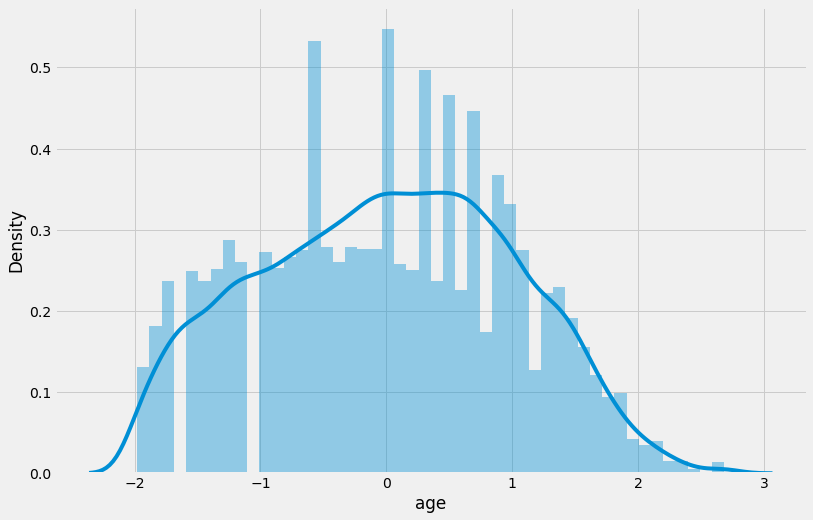

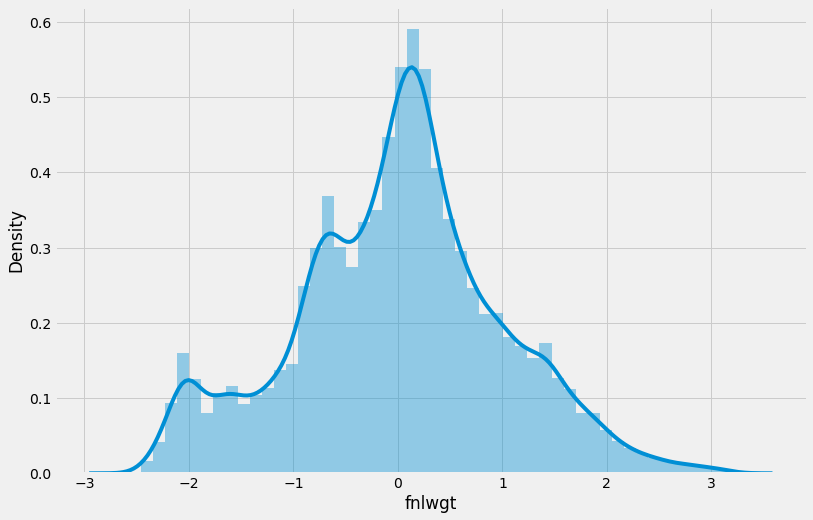

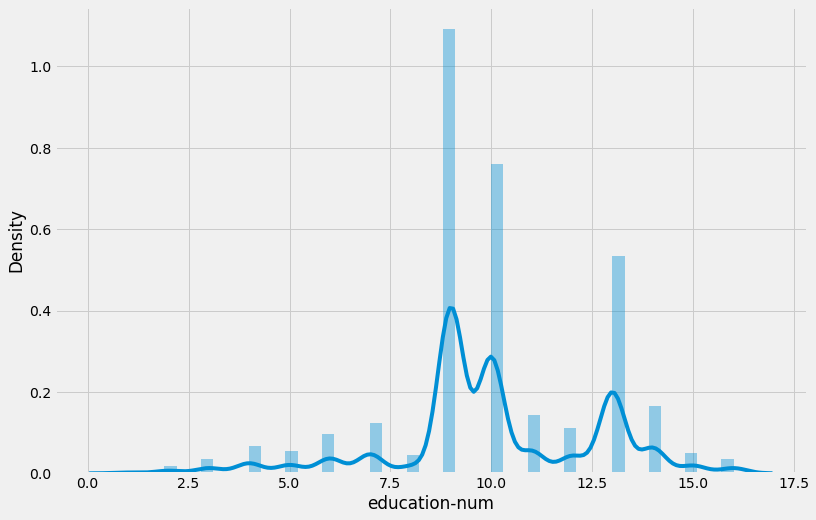

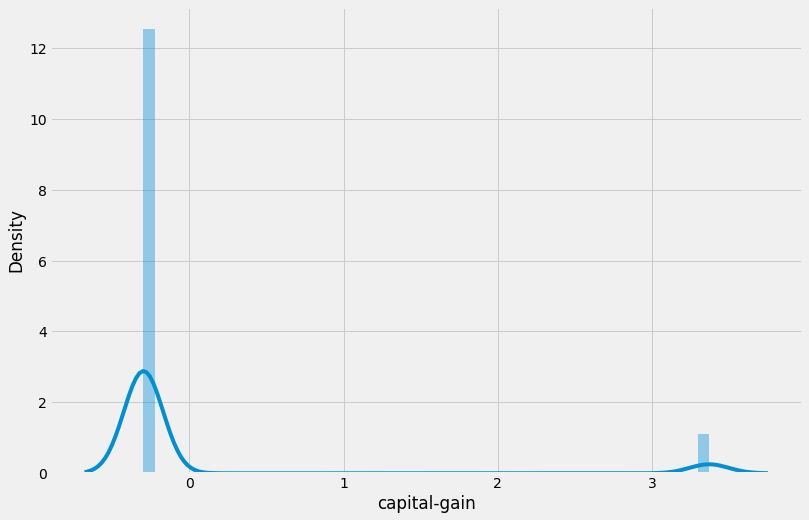

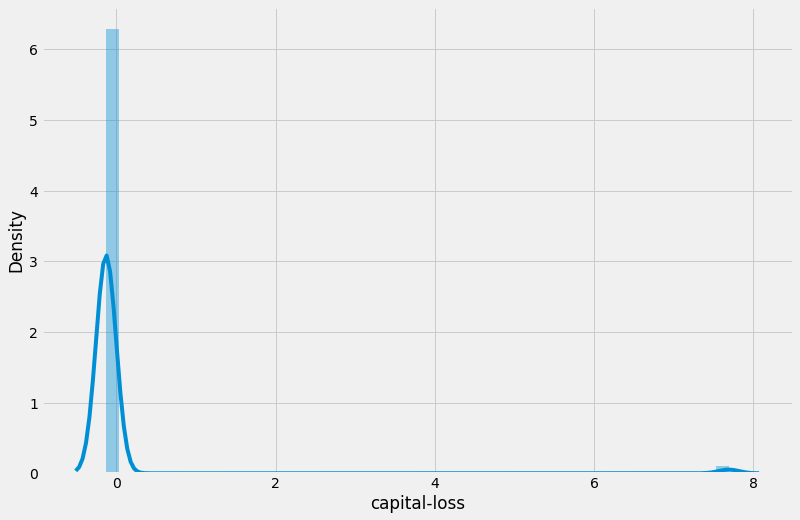

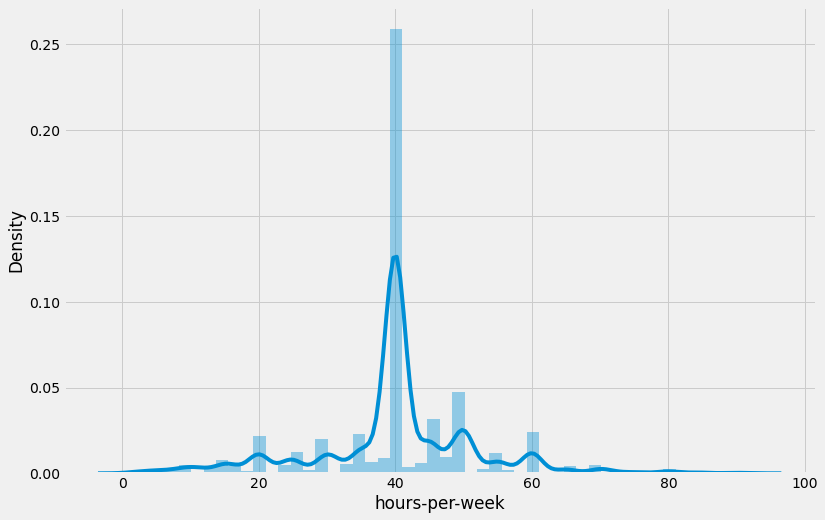

<Figure size 864x576 with 0 Axes>

In [71]:
for i in num_cols:
    sns.distplot(df[i])
    plt.figure()

In [72]:
#A lot of skewness has been resuced but we cannot remove skewness more than this.

In [73]:
#Separating dependent and independent features.
x=df.copy()
x.drop('salary',axis=1,inplace=True)
y=df['salary']

In [74]:
#Oversampling using Smote
from imblearn.over_sampling import SMOTE
over=SMOTE()

In [75]:
x,y=over.fit_resample(x,y)

'\nData is balanced now, both the category of income have 50% data each.\n\n'

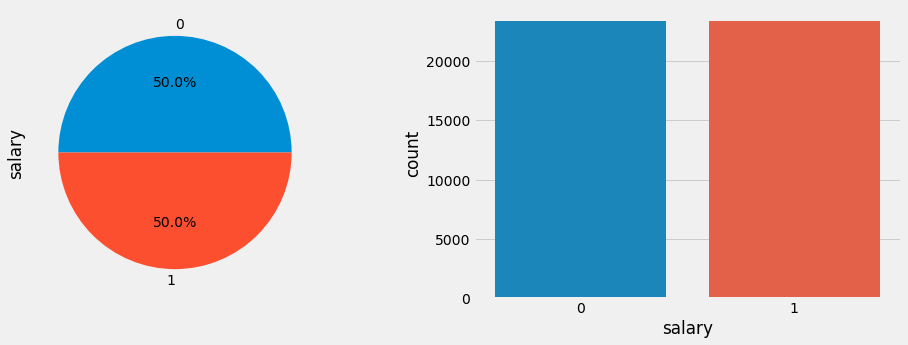

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(y)
y.value_counts()


"""
Data is balanced now, both the category of income have 50% data each.

"""

**scaling the data**

In [77]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [78]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

## model selection

In [85]:
#We import Classification Models
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [86]:
from sklearn.model_selection import train_test_split, cross_val_score

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [88]:
#To evaluate performances of all the models
def performance(p,ytest,m,xtest,s):
    print('------------------------------------',m,'------------------------------------')
    print('Accuracy',np.round(accuracy_score(p,ytest),4))
    print('----------------------------------------------------------')
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    print('----------------------------------------------------------')
    print('AUC_ROC Score',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
    print('----------------------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(p,ytest))
    print('----------------------------------------------------------')
    print('Classification Report')
    print(classification_report(p,ytest))

In [89]:
#Creating a list of models which will be created one by one
models=[GaussianNB(),KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0)]

In [90]:
#Creates and trains model from the models list
def createmodel(x,y):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=101)
    for i in models:
        model=i
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,x,y,cv=10)
        performance(p,ytest,model,xtest,score) 

In [91]:
createmodel(x,y)

------------------------------------ GaussianNB() ------------------------------------
Accuracy 0.7834
----------------------------------------------------------
Mean of Cross Validation Score 0.7782
----------------------------------------------------------
AUC_ROC Score 0.8644
----------------------------------------------------------
Confusion Matrix
[[4482 1145]
 [1392 4693]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      5627
           1       0.80      0.77      0.79      6085

    accuracy                           0.78     11712
   macro avg       0.78      0.78      0.78     11712
weighted avg       0.78      0.78      0.78     11712

------------------------------------ KNeighborsClassifier() ------------------------------------
Accuracy 0.8501
----------------------------------------------------------
Mean of Cross Validation Score 0.8588

Random Forest, Gradient Boost, Xtreme Gradient Boost give us the best performance, so we further try hyperparameter tuning on them

In [102]:
#xgb performs better among all model so we will choose it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [107]:
#hyperparameter tuning for xgboost
import optuna
def objective(trial):
    params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1),
        'max_depth': trial.suggest_int('max_depth', 2, 9),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-8, 1),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1),
        'colsample_bylevel': trial.suggest_uniform('colsample_bylevel', 0.5, 1),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'objective': 'binary:logistic',
    }
    clf = XGBClassifier(**params)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    return -roc_auc_score(y_test, pred)

In [109]:
#run hyperparameter tuning
study = optuna.create_study()
study.optimize(objective, n_trials=10)

[I 2021-12-10 16:15:00,115] A new study created in memory with name: no-name-8758ef87-8260-4c30-b265-f21be9beab49
[I 2021-12-10 16:15:35,644] Trial 0 finished with value: -0.846894592476489 and parameters: {'learning_rate': 0.00364499193419756, 'max_depth': 5, 'min_child_weight': 2.1999633032959216e-05, 'gamma': 1.0443460025484499e-08, 'subsample': 0.9584297700378123, 'colsample_bytree': 0.8250313088048189, 'colsample_bylevel': 0.7964421042300609, 'reg_alpha': 0.030166705681805968, 'reg_lambda': 0.8848248806945564, 'n_estimators': 448}. Best is trial 0 with value: -0.846894592476489.
[I 2021-12-10 16:16:07,102] Trial 1 finished with value: -0.8788405810308376 and parameters: {'learning_rate': 0.010157055065745142, 'max_depth': 9, 'min_child_weight': 2.8579849184436302e-06, 'gamma': 0.00010411563578862566, 'subsample': 0.6914188324490048, 'colsample_bytree': 0.8890570335515764, 'colsample_bylevel': 0.568468286035552, 'reg_alpha': 0.010878936609592908, 'reg_lambda': 9.408956773441977e-05

In [110]:
#show results
print(study.best_params)
print(study.best_value)

{'learning_rate': 0.03125999577306311, 'max_depth': 9, 'min_child_weight': 5.145059115450818e-06, 'gamma': 0.02810715905283532, 'subsample': 0.8238728569946043, 'colsample_bytree': 0.8049634980552405, 'colsample_bylevel': 0.9449990388848694, 'reg_alpha': 0.022932992629365996, 'reg_lambda': 2.5406456895163724e-06, 'n_estimators': 199}
-0.8993331723408908


In [116]:
#setting fixed seed
import random
import os

SEED = 42

def seed_everything(seed=64):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(SEED)

**finalizing the model**

In [138]:
params = {'learning_rate': 0.03125999577306311, 'max_depth': 9, 'min_child_weight': 5.145059115450818e-06, 
          'gamma': 0.02810715905283532, 'subsample': 0.8238728569946043, 'colsample_bytree': 0.8049634980552405, 
          'colsample_bylevel': 0.9449990388848694, 'reg_alpha': 0.022932992629365996, 'reg_lambda': 2.5406456895163724e-06, 'n_estimators': 199}

In [143]:
def performance1(p,ytest,m,xtest,s):
    print('------------------------------------',m,'------------------------------------')
    print('Accuracy',np.round(accuracy_score(p,ytest),4))
    print('----------------------------------------------------------')
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    print('----------------------------------------------------------')
    print('AUC_ROC Score',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
    print('----------------------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(p,ytest))
    print('----------------------------------------------------------')
    print('Classification Report')
    print(classification_report(p,ytest))

In [144]:
models1=[XGBClassifier(**params, verbosity=0)]

In [145]:
#Creates and trains model from the models list
def createmodel(x,y):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=101)
    for i in models1:
        model=i
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,x,y,cv=5)
        performance1(p,ytest,model,xtest,score) 

In [146]:
createmodel(x,y)

------------------------------------ XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=0.9449990388848694, colsample_bynode=1,
              colsample_bytree=0.8049634980552405, gamma=0.02810715905283532,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.03125999577306311, max_delta_step=0, max_depth=9,
              min_child_weight=5.145059115450818e-06, missing=nan,
              monotone_constraints='()', n_estimators=199, n_jobs=2,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0.022932992629365996, reg_lambda=2.5406456895163724e-06,
              scale_pos_weight=1, subsample=0.8238728569946043,
              tree_method='exact', validate_parameters=1, verbosity=0) ------------------------------------
Accuracy 0.901
----------------------------------------------------------
Mean of Cross Validation Score 0.8902
--------------------------------------------------------

**looks like our xgboost model with hyperparameter tuning gives us bit lower performance with respect to default parameters**

In [147]:
#choosing xgboost with deafault parameter as our final model

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [148]:
predictions = xgb.predict(X_test)

In [153]:
print('------------------------------------------------------------------------')
print('Accuracy',np.round(accuracy_score(y_test, predictions),4))
print('----------------------------------------------------------')
print('AUC_ROC Score',np.round(roc_auc_score(y_test,xgb.predict_proba(X_test)[:,1]),4))
print('----------------------------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(y_test, predictions))

------------------------------------------------------------------------
Accuracy 0.9062
----------------------------------------------------------
AUC_ROC Score 0.9716
----------------------------------------------------------
Confusion Matrix
[[3204  315]
 [ 344 3165]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3519
           1       0.91      0.90      0.91      3509

    accuracy                           0.91      7028
   macro avg       0.91      0.91      0.91      7028
weighted avg       0.91      0.91      0.91      7028

